In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import uproot
from scipy.optimize import curve_fit


/home/rhythm/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


## path to .root file

In [67]:
ucna_1_path = "/home/rhythm/Research/ml/research/2024/feb/ethr-rootfiles/ucna_Ethr1.root" #UCNA
ucna_2_path = "/home/rhythm/Research/ml/research/2024/feb/ethr-rootfiles/ucna_Ethr1.root" #UCNA
ucna_3_path = "/home/rhythm/Research/ml/research/2024/feb/ethr-rootfiles/ucna_Ethr3.root" #UCNA


In [10]:
ucna_p_1_path = "/home/rhythm/Research/ml/research/2024/feb/ethr-rootfiles/ucnap_Ethr1.root" #UCNA+
ucna_p_2_path = "/home/rhythm/Research/ml/research/2024/feb/ethr-rootfiles/ucnap_Ethr1.root" #UCNA+
ucna_p_3_path = "/home/rhythm/Research/ml/research/2024/feb/ethr-rootfiles/ucnap_Ethr3.root" #UCNA+


In [11]:
#converting them to df
ucna_p_1 = uproot.open(ucna_p_1_path)
ucna_p_2 = uproot.open(ucna_p_2_path)
ucna_p_3 = uproot.open(ucna_p_3_path)

ucna_1 = uproot.open(ucna_1_path)
ucna_2 = uproot.open(ucna_2_path)
ucna_3 = uproot.open(ucna_3_path)


#ucna_p_1.

## keys

In [5]:
keys = ['EdepType01;1','EdepType11;1','EdepType02;1','EdepType12;1','EdepType0;1','EdepType1;1','EdepType01Thr0;1','EdepType11Thr0;1','EdepType02Thr0;1','EdepType12Thr0;1',
]

In [6]:
# Assuming ucnaP is a dictionary containing file paths bin width  5 kev
ucnaP = {
    "1": "/home/rhythm/Research/ml/research/2024/mar/eth-5binwidth-ucnaP/n_ucnap_Ethr1_5binwidth.root",
    "2": "/home/rhythm/Research/ml/research/2024/mar/eth-5binwidth-ucnaP/n_ucnap_Ethr2_5binwidth.root",
    "3": "/home/rhythm/Research/ml/research/2024/mar/eth-5binwidth-ucnaP/n_ucnap_Ethr3-5binwidth.root"
}

## nEvents

In [71]:

eLower = [120,150,180,220,260,300]
eUpper = 660
nTot = {}
for key, value in ucnaP.items():
    root_file = uproot.open(value)

    histogram = root_file['KE;1']
    nTot[key]=[]
    for energy in eLower:
        # Define the range of bins you're interested in
        lower_value = energy  # Replace with your lower bound
        upper_value = eUpper  # Replace with your upper bound

        # Get the bin edges and contents
        bin_edges = histogram.axis().edges()
        bin_contents = histogram.values()

        # Find the indices corresponding to the bin edges
        bin_start = (bin_edges >= lower_value).nonzero()[0][0]
        bin_end = (bin_edges <= upper_value).nonzero()[0][-1]

        # Calculate the total content within the specified range
        total_content = sum(bin_contents[bin_start:bin_end])

        nTot[key].append(total_content)

In [12]:
#nTot= [73069975.0, 68152629.0, 62908822.0, 55605052.0, 48162687.0]
nEvents = 8.73125e+07
nTot =[73069975.0, 68152629.0, 62908822.0, 55605052.0, 48162687.0, 40781077.0]

In [3]:
# Assuming ucnaP is a dictionary containing file paths
#bin qidth 0.1 keV
#ucnaP = {
#    "1": "/home/rhythm/Research/ml/research/2024/feb/ethr-root/n_ucnap_Ethr1.root",
#    "2": "/home/rhythm/Research/ml/research/2024/feb/ethr-root/n_ucnap_Ethr2.root",
#    "3": "/home/rhythm/Research/ml/research/2024/feb/ethr-root/n_ucnap_Ethr3.root"
#}

In [23]:
# Assuming ucnaP is a dictionary containing file paths
#ucnaP_misid = {
#    "1": "/home/rhythm/Research/ml/research/2024/feb/ethr-root-misid-events/n_ucnap_Ethr1.root",
#    "2": "/home/rhythm/Research/ml/research/2024/feb/ethr-root-misid-events/n_ucnap_Ethr2.root",
#    "3": "/home/rhythm/Research/ml/research/2024/feb/ethr-root-misid-events/n_ucnap_Ethr3.root"
#}

In [18]:
key_misid = ['misEdepType01;1','misEdepType11;1','misEdepType02;1','misEdepType12;1']

In [ ]:
#converting them to df
ucna_p_1 = uproot.open(ucnaP["1"])
ucna_p_1.keys()

In [6]:
ucna = {
"1": "/home/rhythm/Research/ml/research/2024/feb/ethr-root/n_ucna_Ethr1.root",
"2": "/home/rhythm/Research/ml/research/2024/feb/ethr-root/n_ucna_Ethr2.root",
"3": "/home/rhythm/Research/ml/research/2024/feb/ethr-root/n_ucna_Ethr3.root" 
}

## ucnap-df

In [20]:
del ucnaP_df

In [8]:
ucnaP_df = {}
for file_num, file_path in ucnaP.items():
    # Open the ROOT file using uproot
    print(f'file_num : {file_num}')
    with uproot.open(file_path) as file:
        # Access the TTree within the file (replace "tree_name" with the actual tree name)
     #   tree = file["tree_name"]

        # Initialize dictionaries to store results
        content_dict = {}
        edge_dict = {}

        # Loop through the list of keys
        for key in keys:
            # Access the specific branch using the key
            branch = file[key]
            

            # Extract values and edges
            nVal = branch.values()
            nEdge = branch.axis().edges()[:-1]

            # Store results in dictionaries
            content_dict[key] = nVal
            edge_dict[key] = nEdge

        # Create DataFrames from the dictionaries
        values_df = pd.DataFrame(content_dict)
        edge_df = pd.DataFrame(edge_dict)

        # Take one column from edge_df and rename it
        select_edge_col = edge_df['EdepType01;1'].rename('Evals')

        # Concatenate values_df and select_edge_col
        ucnaP_df[file_num] = pd.concat([values_df, select_edge_col], axis=1)

        # Delete temporary DataFrames to free up memory
        del values_df, edge_df, select_edge_col


file_num : 1
file_num : 2
file_num : 3


In [8]:
ucnaP_df["1"].head()

,EdepType01;1,EdepType11;1,EdepType02;1,EdepType12;1,EdepType0;1,EdepType1;1,EdepType01Thr0;1,EdepType11Thr0;1,EdepType02Thr0;1,EdepType12Thr0;1,Evals
0,0.0,0.0,0.0,0.0,0.0,0.0,32998.0,34.0,41586.0,18.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,97846.0,392.0,113597.0,432.0,5.0
2,141203.0,0.0,156976.0,0.0,298179.0,0.0,139000.0,1089.0,154884.0,1077.0,10.0
3,167245.0,0.0,184248.0,0.0,351493.0,0.0,165169.0,1714.0,182283.0,1783.0,15.0
4,189590.0,314.0,205950.0,319.0,395540.0,633.0,187706.0,2369.0,204223.0,2463.0,20.0


## ucna-df 

In [8]:
ucna_df = {}
for file_num, file_path in ucna.items():
    # Open the ROOT file using uproot
    print(f'file_num : {file_num}')
    with uproot.open(file_path) as file:
        # Access the TTree within the file (replace "tree_name" with the actual tree name)
     #   tree = file["tree_name"]

        # Initialize dictionaries to store results
        content_dict = {}
        edge_dict = {}

        # Loop through the list of keys
        for key in keys:
            # Access the specific branch using the key
            branch = file[key]

            # Extract values and edges
            nVal = branch.values()
            nEdge = branch.axis().edges()[:-1]

            # Store results in dictionaries
            content_dict[key] = nVal
            edge_dict[key] = nEdge

        # Create DataFrames from the dictionaries
        values_df = pd.DataFrame(content_dict)
        edge_df = pd.DataFrame(edge_dict)

        # Take one column from edge_df and rename it
        select_edge_col = edge_df['EdepType01;1'].rename('Evals')

        # Concatenate values_df and select_edge_col
        ucna_df[file_num] = pd.concat([values_df, select_edge_col], axis=1)

        # Delete temporary DataFrames to free up memory
        del values_df, edge_df, select_edge_col


file_num : 1
file_num : 2
file_num : 3


## misid df ucna+

In [19]:
ucnaPmis_df = {}
for file_num, file_path in ucnaP.items():
    # Open the ROOT file using uproot
    print(f'file_num : {file_num}')
    with uproot.open(file_path) as file:
        # Access the TTree within the file (replace "tree_name" with the actual tree name)
     #   tree = file["tree_name"]

        # Initialize dictionaries to store results
        content_dict = {}
        edge_dict = {}

        # Loop through the list of keys
        for key in key_misid:
            # Access the specific branch using the key
            branch = file[key]

            # Extract values and edges
            nVal = branch.values()
            nEdge = branch.axis().edges()[:-1]

            # Store results in dictionaries
            content_dict[key] = nVal
            edge_dict[key] = nEdge

        # Create DataFrames from the dictionaries
        values_df = pd.DataFrame(content_dict)
        edge_df = pd.DataFrame(edge_dict)

        # Take one column from edge_df and rename it
        select_edge_col = edge_df['misEdepType01;1'].rename('Evals')

        # Concatenate values_df and select_edge_col
        ucnaPmis_df[file_num] = pd.concat([values_df, select_edge_col], axis=1)

        # Delete temporary DataFrames to free up memory
        del values_df, edge_df, select_edge_col


file_num : 1
file_num : 2
file_num : 3


## ucna+ UCNA angle distribution

In [197]:
keyAngle = ['pz11;1','pz12;1','pz01;1','pz02;1',]

In [204]:
ucnaAngleInfo_df = {}
for file_num, file_path in ucna.items():
    # Open the ROOT file using uproot
    print(f'file_num : {file_num}')
    with uproot.open(file_path) as file:
        # Access the TTree within the file (replace "tree_name" with the actual tree name)
     #   tree = file["tree_name"]

        # Initialize dictionaries to store results
        content_dict = {}
        edge_dict = {}

        # Loop through the list of keys
        for key in keyAngle:
            # Access the specific branch using the key
            branch = file[key]

            # Extract values and edges
            nVal = branch.values()
            nEdge = branch.axis().edges()[:-1]

            # Store results in dictionaries
            content_dict[key] = nVal
            edge_dict[key] = nEdge

        # Create DataFrames from the dictionaries
        values_df = pd.DataFrame(content_dict)
        edge_df = pd.DataFrame(edge_dict)

        # Take one column from edge_df and rename it
        select_edge_col = edge_df['pz11;1'].rename('cosTh')

        # Concatenate values_df and select_edge_col
        ucnaAngleInfo_df[file_num] = pd.concat([values_df, select_edge_col], axis=1)

        # Delete temporary DataFrames to free up memory
        del values_df, edge_df, select_edge_col


file_num : 1
file_num : 2
file_num : 3


In [203]:
ucnaAngleInfo_df["1"]

,pz11;1,pz12;1,pz01;1,pz02;1,Evals
0,9.0,1169.0,335.0,457599.0,-1.00
1,7.0,1242.0,327.0,457261.0,-0.99
2,11.0,1194.0,376.0,456280.0,-0.98
3,6.0,1388.0,333.0,455897.0,-0.97
4,8.0,1327.0,396.0,456011.0,-0.96
...,...,...,...,...,...
195,1170.0,7.0,384061.0,356.0,0.95
196,1076.0,7.0,384357.0,333.0,0.96
197,1066.0,8.0,383145.0,339.0,0.97
198,1053.0,4.0,383577.0,345.0,0.98


In [205]:
ucnaPAngleInfo_df = {}
for file_num, file_path in ucnaP.items():
    # Open the ROOT file using uproot
    print(f'file_num : {file_num}')
    with uproot.open(file_path) as file:
        # Access the TTree within the file (replace "tree_name" with the actual tree name)
     #   tree = file["tree_name"]

        # Initialize dictionaries to store results
        content_dict = {}
        edge_dict = {}

        # Loop through the list of keys
        for key in keyAngle:
            # Access the specific branch using the key
            branch = file[key]

            # Extract values and edges
            nVal = branch.values()
            nEdge = branch.axis().edges()[:-1]

            # Store results in dictionaries
            content_dict[key] = nVal
            edge_dict[key] = nEdge

        # Create DataFrames from the dictionaries
        values_df = pd.DataFrame(content_dict)
        edge_df = pd.DataFrame(edge_dict)

        # Take one column from edge_df and rename it
        select_edge_col = edge_df['pz11;1'].rename('cosTh')

        # Concatenate values_df and select_edge_col
        ucnaPAngleInfo_df[file_num] = pd.concat([values_df, select_edge_col], axis=1)

        # Delete temporary DataFrames to free up memory
        del values_df, edge_df, select_edge_col


file_num : 1
file_num : 2
file_num : 3


In [206]:
ucnaPAngleInfo_df["1"]

,pz11;1,pz12;1,pz01;1,pz02;1,cosTh
0,36.0,1623.0,126.0,470911.0,-1.00
1,28.0,1656.0,115.0,469862.0,-0.99
2,28.0,1666.0,134.0,467379.0,-0.98
3,27.0,1842.0,108.0,469523.0,-0.97
4,32.0,1804.0,130.0,468342.0,-0.96
...,...,...,...,...,...
195,1583.0,14.0,397287.0,129.0,0.95
196,1524.0,21.0,396496.0,139.0,0.96
197,1514.0,25.0,396447.0,105.0,0.97
198,1357.0,23.0,396739.0,128.0,0.98


/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


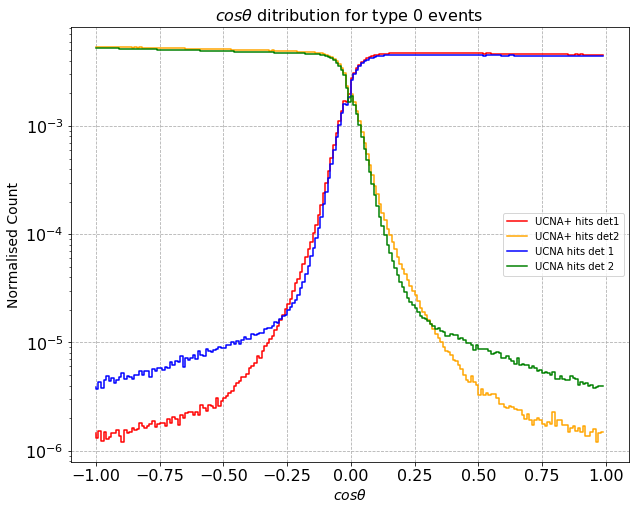

In [226]:
plt.figure(figsize=(10,8))
plt.step(ucnaPAngleInfo_df["1"]["cosTh"], ucnaPAngleInfo_df["1"]["pz01;1"]/NTot,c  = 'red',label = 'UCNA+ hits det1')

plt.step(ucnaPAngleInfo_df["1"]["cosTh"], ucnaPAngleInfo_df["1"]["pz02;1"]/NTot,c  = 'orange',label = 'UCNA+ hits det2')
plt.step(ucnaAngleInfo_df["1"]["cosTh"], ucnaAngleInfo_df["1"]["pz01;1"]/NTot, c='blue', label = 'UCNA hits det 1')
plt.step(ucnaAngleInfo_df["1"]["cosTh"], ucnaAngleInfo_df["1"]["pz02;1"]/NTot, c='green', label = 'UCNA hits det 2')
plt.yscale('log')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.grid(linestyle = '--')
plt.legend()
plt.xlabel(r'$cos \theta$', fontsize = 14)
plt.ylabel('Normalised Count', fontsize = 14)
plt.title(r"$cos \theta$ ditribution for type 0 events ", fontsize = 16)
plt.savefig(f'./feb/ethr-root/cosThType0.png')

/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive top ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


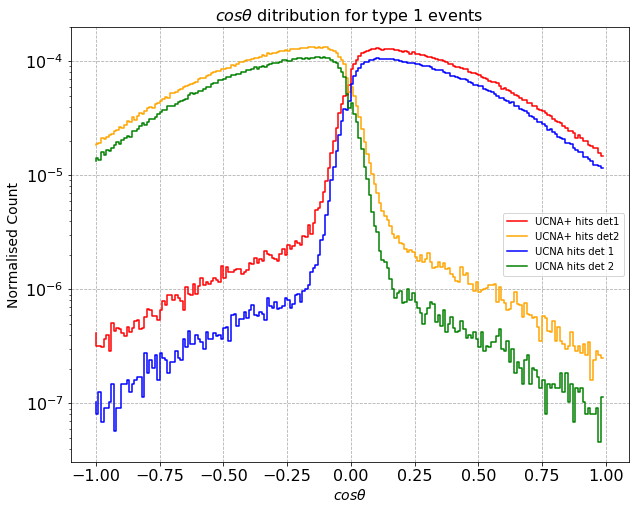

In [227]:
plt.figure(figsize=(10,8))
plt.step(ucnaPAngleInfo_df["1"]["cosTh"], ucnaPAngleInfo_df["1"]["pz11;1"]/NTot,c  = 'red',label = 'UCNA+ hits det1')
plt.step(ucnaPAngleInfo_df["1"]["cosTh"], ucnaPAngleInfo_df["1"]["pz12;1"]/NTot,c  = 'orange',label = 'UCNA+ hits det2')

plt.step(ucnaAngleInfo_df["1"]["cosTh"], ucnaAngleInfo_df["1"]["pz11;1"]/NTot, c='blue', label = 'UCNA hits det 1')
plt.step(ucnaAngleInfo_df["1"]["cosTh"], ucnaAngleInfo_df["1"]["pz12;1"]/NTot, c='green', label = 'UCNA hits det 2')
plt.yscale('log')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.grid(linestyle = '--')
plt.ylim(10^-9,10^-3)
plt.legend()
plt.xlabel(r'$cos \theta$', fontsize = 14)
plt.ylabel('Normalised Count', fontsize = 14)
plt.title(r"$cos \theta$ ditribution for type 1 events ", fontsize = 16)
plt.savefig(f'./feb/ethr-root/cosThType1.png')

## asymmetry - type 0 and type 1

In [16]:
def beta (KE): # beta = p_E / Ee = np.sqrt((KE)^2 + 2*m_e*KE) / (m_e + KE)
    m_e = 511; 
    beta = np.sqrt((KE*KE) + (2*m_e*KE)) / (m_e + KE)
    return beta

In [17]:
def asymm_meas(df, col1, col2, col,errCol):
    df['EMid'] = df.Evals -0.05
    df['beta'] = beta(df['EMid'])
    df[col] = (df[col1] - df[col2])/((df[col1] + df[col2])*(df['beta']/2))
    df[errCol] = df[col]*np.sqrt((1/df[col1]) + (1/df[col2])) 
   
    return df

In [51]:
def asymm_meas_type1(df):
    df['A_meas1'] = (df["EdepType11;1"] - df["EdepType12;1"])/((df["EdepType11;1"] + df["EdepType12;1"])*(df['beta']/2))
    df['errA_meas1'] = df['A_meas1']*np.sqrt(df["EdepType11;1"] + df["EdepType12;1"]) 
   
    return df

## adding A col

In [28]:
for key in ucnaP_df.keys():
   ucnap_item = asymm_meas(df = ucnaP_df[key], col1='EdepType01;1', col2 = 'EdepType02;1', col = 'a_type0', errCol='errA_type0')
   ucnap_item = asymm_meas(df = ucnaP_df[key], col1='EdepType11;1', col2 = 'EdepType12;1', col = 'a_type1', errCol='errA_type1')
   ucnap_item = asymm_meas(df = ucnaPmis_df[key], col1='misEdepType01;1', col2 = 'misEdepType02;1', col = '', errCol='errA_type0MisId')
   ucnap_item = asymm_meas(df = ucnaPmis_df[key], col1='misEdepType11;1', col2 = 'misEdepType12;1', col = 'a_type1misid', errCol='errA_type1MisId')
  

/home/rhythm/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [53]:
#for key in ucna_df.keys():
#    ucnap_item = asymm_meas(ucnaP_df[key])
#    ucna_item = asymm_meas(ucna_df[key])

/home/rhythm/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [52]:
#for key in ucnaPmis_df.keys():
#   ucnap_item = asymm_meas(df = ucnaPmis_df[key], col1='misEdepType01;1', col2 = 'misEdepType02;1', col = 'a_type0', errCol='errA_type0')
#   ucnap_item = asymm_meas(df = ucnaPmis_df[key], col1='misEdepType11;1', col2 = 'misEdepType12;1', col = 'a_type1', errCol='errA_type1')
  

/home/rhythm/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
def linear_function(x, m, b):
    return m * x + b

def fittingFunc(df,col, fitting_range, a, errA ):
    x_data = df[key]['Evals']
    y_data = df[key][col]

    mask = (x_data >= fitting_range[0]) & (x_data <= fitting_range[1])&  (~np.isnan(y_data))
    x_data_filtered = x_data[mask]
    y_data_filtered = y_data[mask]
    params, covariance = curve_fit(linear_function,  x_data_filtered, y_data_filtered)
    fitted_m = params[0]
    fitted_b = params[1]
    
    a.append(fitted_b)
    errA.append(covariance[1])
    y_pred = linear_function(x_data_filtered, fitted_m, fitted_b)
    return y_pred, x_data, a,errA,x_data_filtered, y_data

## fitting ucna+ A

In [21]:
a0_misid = []
a1_misid = []
aMeas0_ucnap = []
aMeas1_ucnap = []
erra0_misid = []
erra1_misid = []
erraMeas0_ucnap = []
erraMeas1_ucnap = []



In [ ]:
E_list = [120,150,180,220,260,300]

for key in ucnaP_df.keys():
    for Ewin in E_list :  
        fitting_range = (Ewin, 660)  # Example: fit between x=2 and x=4
        # Filter the data within the desired range
        x_data = ucnaPmis_df[key]['Evals']
        y_data = ucnaPmis_df[key]['a_type1misid'] ################################################

        mask = (x_data >= fitting_range[0]) & (x_data <= fitting_range[1])&  (~np.isnan(y_data))
        x_data_filtered = x_data[mask]
        y_data_filtered = y_data[mask]
        params, covariance = curve_fit(linear_function,  x_data_filtered, y_data_filtered)
        fitted_m = params[0]
        fitted_b = params[1]
        # Extract standard errors (errors in the parameters)
errors = np.sqrt(np.diag(covariance))

# Get the error in 'b'
error_b = errors[1]
        a1_misid.append(fitted_b) ################################################
        erra1_misid.append(covariance[1]) ###################
        y_pred = linear_function(x_data_filtered, fitted_m, fitted_b)
        plt.figure(figsize=(12, 10))
##
        ## Plot the original data and the fitted linear curve
    #    plt.scatter(x_data, y_data,  marker='o', facecolors='none', edgecolors='salmon',label='UCNA+')
        plt.scatter(x_data, y_data,  marker='o', color='salmon',label='UCNA+')
    
        plt.plot(x_data_filtered, y_pred, label='UCNA+ - fit', color='red')
     #
        plt.xlabel("Energy (keV)", fontsize=16)
        plt.ylabel("Asymmetry", fontsize=16)
        #plt.ylim(-1.0, -0.04) #######
        plt.yticks( fontsize=16)
        plt.xlim(0, 820)
        plt.xticks(np.arange(0, 820, 50), fontsize=16)
        plt.grid(linestyle='--')
#
        ## Add a legend if needed
        plt.legend()
    # An#notate the plot with the fitted intercept value in a box
        plt.text(0.2, 0.95, f"Fitted A_meas ': {fitted_b:.4f}", transform=plt.gca().transAxes,
                 bbox=dict(facecolor='white', alpha=0.5), fontsize = 16)
        
        plt.legend(fontsize = 16)
       # plt.show()
        plt.title(f"Asymmetry Type 1 mis  E_Thr > {key}0 (keV) window [{Ewin}, 660] keV", fontsize=16) ######
        plt.savefig(f'./mar/aType1mis{str(key)}forWin{str(Ewin)}660.png') #####
 

In [42]:
### 5 keV binWidth values
print(f'a0_misid  = {a0_misid}') 
print(f'a1_misid  = {a1_misid}') 
print(f'aMeas0_ucnap = {aMeas0_ucnap}')
print(f'aMeas1_ucnap = {aMeas1_ucnap}')
print(f'erra0_misid = {erra0_misid}')
print(f'erra1_misid = {erra1_misid}')
print(f'erraMeas0_ucnap = {erraMeas0_ucnap}')
print(f'erraMeas1_ucnap = {erraMeas1_ucnap}')



a0_misid  = [-0.1419512564923045, -0.14046010382056676, -0.1380851594673857, -0.13680989168728944, -0.13585059299430635, -0.13518071353418687, -0.14175261568165787, -0.1402825780706749, -0.13793282615534297, -0.13666389141102397, -0.13570923098332224, -0.13502857358612952, -0.14157943921427935, -0.14013405146625926, -0.1378180419392322, -0.136568638464592, -0.13561772819796478, -0.1349236420354904, -0.1419512564923045, -0.1419512564923045, -0.14046010382056676, -0.1380851594673857, -0.13680989168728944, -0.13585059299430635, -0.13518071353418687, -0.1419512564923045, -0.14046010382056676, -0.1380851594673857, -0.13680989168728944, -0.13585059299430635, -0.13518071353418687, -0.14175261568165787, -0.1402825780706749, -0.13793282615534297, -0.13666389141102397, -0.13570923098332224, -0.13502857358612952, -0.14157943921427935, -0.14013405146625926, -0.1378180419392322, -0.136568638464592, -0.13561772819796478, -0.1349236420354904, -0.1419512564923045, -0.14046010382056676, -0.138085159467

In [ ]:

#a0_misid  = [-0.1419512564923045, -0.14046010382056676, -0.1380851594673857, -0.13680989168728944, -0.13585059299430635, -0.13518071353418687, -0.14175261568165787, -0.1402825780706749, -0.13793282615534297, -0.13666389141102397, -0.13570923098332224, -0.13502857358612952, -0.14157943921427935, -0.14013405146625926, -0.1378180419392322, -0.136568638464592, -0.13561772819796478, -0.1349236420354904, -0.1419512564923045, -0.1419512564923045, -0.14046010382056676, -0.1380851594673857, -0.13680989168728944, -0.13585059299430635, -0.13518071353418687, -0.1419512564923045, -0.14046010382056676, -0.1380851594673857, -0.13680989168728944, -0.13585059299430635, -0.13518071353418687, -0.14175261568165787, -0.1402825780706749, -0.13793282615534297, -0.13666389141102397, -0.13570923098332224, -0.13502857358612952, -0.14157943921427935, -0.14013405146625926, -0.1378180419392322, -0.136568638464592, -0.13561772819796478, -0.1349236420354904, -0.1419512564923045, -0.14046010382056676, -0.1380851594673857, -0.13680989168728944, -0.13585059299430635, -0.13518071353418687, -0.14175261568165787, -0.1402825780706749, -0.13793282615534297, -0.13666389141102397, -0.13570923098332224, -0.13502857358612952, -0.14157943921427935, -0.14013405146625926, -0.1378180419392322, -0.136568638464592, -0.13561772819796478, -0.1349236420354904, -0.36665793970481647, -0.353935847050836, -0.34182544910305046, -0.3214064125011809, -0.3170339943394241, -0.2991497925962159, -0.36034036945719566, -0.3481923327685345, -0.3369795174256161, -0.317514436301201, -0.3134949883378847, -0.2958767876550171, -0.35359885425292503, -0.34263710573397105, -0.33209133616951725, -0.31319845835549615, -0.30940572317860654, -0.29152542115254776, -0.36665793970481647, -0.353935847050836, -0.34182544910305046, -0.3214064125011809, -0.3170339943394241, -0.2991497925962159, -0.36034036945719566, -0.3481923327685345, -0.3369795174256161, -0.317514436301201, -0.3134949883378847, -0.2958767876550171, -0.35359885425292503, -0.34263710573397105, -0.33209133616951725, -0.31319845835549615, -0.30940572317860654, -0.29152542115254776, -0.36665793970481647, -0.353935847050836, -0.34182544910305046, -0.3214064125011809, -0.3170339943394241, -0.2991497925962159, -0.36034036945719566, -0.3481923327685345, -0.3369795174256161, -0.317514436301201, -0.3134949883378847, -0.2958767876550171, -0.35359885425292503, -0.34263710573397105, -0.33209133616951725, -0.31319845835549615, -0.30940572317860654, -0.29152542115254776]
#a1_misid  = [-0.2738156034517305, -0.26584659925012755, -0.2803479678955399, -0.283431125769364, -0.2978477166601663, -0.2842729261359235, -0.2867271534077369, -0.2755438925747667, -0.28188931437545084, -0.2689893608444306, -0.26808931241301115, -0.24843611518330655, -0.29747482474417586, -0.28688764622701934, -0.2956612101441467, -0.2783860002594061, -0.2874882089515569, -0.26466222127766836]
#aMeas0_ucnap = [-0.1419512564923045, -0.14046010382056676, -0.1380851594673857, -0.13680989168728944, -0.13585059299430635, -0.13518071353418687, -0.14175261568165787, -0.1402825780706749, -0.13793282615534297, -0.13666389141102397, -0.13570923098332224, -0.13502857358612952, -0.14157943921427935, -0.14013405146625926, -0.1378180419392322, -0.136568638464592, -0.13561772819796478, -0.1349236420354904]
#aMeas1_ucnap = [-0.10151767186334888, -0.10278990814711088, -0.10258216556960811, -0.08911964392697058, -0.08520858012467034, -0.07842016161910126, -0.1061101479961561, -0.10714192682745402, -0.10517605525649373, -0.09028275178643419, -0.08591657540092257, -0.07888770980256965, -0.10716741021663885, -0.10758463580782694, -0.10693946625877901, -0.09021021230207538, -0.08636859817311265, -0.07990701234309117, -0.10151767186334888, -0.10278990814711088, -0.10258216556960811, -0.08911964392697058, -0.08520858012467034, -0.07842016161910126, -0.1061101479961561, -0.10714192682745402, -0.10517605525649373, -0.09028275178643419, -0.08591657540092257, -0.07888770980256965, -0.10716741021663885, -0.10758463580782694, -0.10693946625877901, -0.09021021230207538, -0.08636859817311265, -0.07990701234309117]
#erra0_misid = [array([-1.62066350e-07,  7.34908568e-05]), array([-1.90572440e-07,  8.75809763e-05]), array([-2.24615173e-07,  1.04820414e-04]), array([-2.82676260e-07,  1.34977913e-04]), array([-4.05442693e-07,  1.98549400e-04]), array([-5.89009053e-07,  2.96345179e-04]), array([-1.55948564e-07,  7.07166758e-05]), array([-1.84090918e-07,  8.46022775e-05]), array([-2.18017670e-07,  1.01741579e-04]), array([-2.75521012e-07,  1.31561283e-04]), array([-3.96910711e-07,  1.94371202e-04]), array([-5.76885770e-07,  2.90245655e-04]), array([-1.50877620e-07,  6.84171973e-05]), array([-1.79977633e-07,  8.27119429e-05]), array([-2.16031187e-07,  1.00814554e-04]), array([-2.74734448e-07,  1.31185699e-04]), array([-3.95045705e-07,  1.93457889e-04]), array([-5.72242129e-07,  2.87909321e-04]), array([-1.62066350e-07,  7.34908568e-05]), array([-1.90572440e-07,  8.75809763e-05]), array([-2.24615173e-07,  1.04820414e-04]), array([-2.82676260e-07,  1.34977913e-04]), array([-4.05442693e-07,  1.98549400e-04]), array([-5.89009053e-07,  2.96345179e-04]), array([-1.55948564e-07,  7.07166758e-05]), array([-1.84090918e-07,  8.46022775e-05]), array([-2.18017670e-07,  1.01741579e-04]), array([-2.75521012e-07,  1.31561283e-04]), array([-3.96910711e-07,  1.94371202e-04]), array([-5.76885770e-07,  2.90245655e-04]), array([-1.50877620e-07,  6.84171973e-05]), array([-1.79977633e-07,  8.27119429e-05]), array([-2.16031187e-07,  1.00814554e-04]), array([-2.74734448e-07,  1.31185699e-04]), array([-3.95045705e-07,  1.93457889e-04]), array([-5.72242129e-07,  2.87909321e-04]), array([-1.62066350e-07,  7.34908568e-05]), array([-1.90572440e-07,  8.75809763e-05]), array([-2.24615173e-07,  1.04820414e-04]), array([-2.82676260e-07,  1.34977913e-04]), array([-4.05442693e-07,  1.98549400e-04]), array([-5.89009053e-07,  2.96345179e-04]), array([-1.55948564e-07,  7.07166758e-05]), array([-1.84090918e-07,  8.46022775e-05]), array([-2.18017670e-07,  1.01741579e-04]), array([-2.75521012e-07,  1.31561283e-04]), array([-3.96910711e-07,  1.94371202e-04]), array([-5.76885770e-07,  2.90245655e-04]), array([-1.50877620e-07,  6.84171973e-05]), array([-1.79977633e-07,  8.27119429e-05]), array([-2.16031187e-07,  1.00814554e-04]), array([-2.74734448e-07,  1.31185699e-04]), array([-3.95045705e-07,  1.93457889e-04]), array([-5.72242129e-07,  2.87909321e-04])]
#erra1_misid = [array([-2.76894905e-06,  1.25561191e-03]), array([-3.52960418e-06,  1.62209279e-03]), array([-4.22978568e-06,  1.97389999e-03]), array([-5.90389444e-06,  2.81910960e-03]), array([-8.82806952e-06,  4.32319521e-03]), array([-1.29993536e-05,  6.54029979e-03]), array([-3.06445377e-06,  1.38961193e-03]), array([-3.88729216e-06,  1.78647471e-03]), array([-4.65270446e-06,  2.17126208e-03]), array([-6.44117002e-06,  3.07565867e-03]), array([-9.67699194e-06,  4.73892113e-03]), array([-1.42688591e-05,  7.17901970e-03]), array([-3.16837710e-06,  1.43673715e-03]), array([-3.89944840e-06,  1.79206132e-03]), array([-4.66484704e-06,  2.17692861e-03]), array([-6.42690612e-06,  3.06884766e-03]), array([-9.60956468e-06,  4.70590131e-03]), array([-1.39436462e-05,  7.01539705e-03])]
#erraMeas0_ucnap = [array([-2.98587930e-09,  1.35398144e-06]), array([-3.60025786e-09,  1.65456295e-06]), array([-3.99954095e-09,  1.86645243e-06]), array([-5.74410233e-09,  2.74280888e-06]), array([-8.51446006e-09,  4.16961740e-06]), array([-1.28162420e-08,  6.44817182e-06]), array([-2.97241726e-09,  1.34787690e-06]), array([-3.58991973e-09,  1.64981187e-06]), array([-3.99610772e-09,  1.86485027e-06]), array([-5.74256714e-09,  2.74207583e-06]), array([-8.50356102e-09,  4.16428007e-06]), array([-1.28110607e-08,  6.44556490e-06]), array([-2.94308460e-09,  1.33457566e-06]), array([-3.55896078e-09,  1.63558415e-06]), array([-3.97443063e-09,  1.85473430e-06]), array([-5.71632821e-09,  2.72954672e-06]), array([-8.47114389e-09,  4.14840506e-06]), array([-1.27563990e-08,  6.41806323e-06])]
#erraMeas1_ucnap = [array([-1.21151559e-07,  5.49375724e-05]), array([-1.56668069e-07,  7.19996159e-05]), array([-1.95399138e-07,  9.11862645e-05]), array([-2.6176153e-07,  1.2499113e-04]), array([-3.68374488e-07,  1.80396722e-04]), array([-5.52705799e-07,  2.78080104e-04]), array([-1.29097757e-07,  5.85408679e-05]), array([-1.66520302e-07,  7.65273851e-05]), array([-2.08128883e-07,  9.71268119e-05]), array([-2.73113679e-07,  1.30411796e-04]), array([-3.91488823e-07,  1.91716048e-04]), array([-5.94390719e-07,  2.99052832e-04]), array([-1.34431099e-07,  6.09593328e-05]), array([-1.67959070e-07,  7.71885971e-05]), array([-2.08150067e-07,  9.71366972e-05]), array([-2.69165507e-07,  1.28526531e-04]), array([-3.79229534e-07,  1.85712549e-04]), array([-5.73350502e-07,  2.88466969e-04]), array([-1.21151559e-07,  5.49375724e-05]), array([-1.56668069e-07,  7.19996159e-05]), array([-1.95399138e-07,  9.11862645e-05]), array([-2.6176153e-07,  1.2499113e-04]), array([-3.68374488e-07,  1.80396722e-04]), array([-5.52705799e-07,  2.78080104e-04]), array([-1.29097757e-07,  5.85408679e-05]), array([-1.66520302e-07,  7.65273851e-05]), array([-2.08128883e-07,  9.71268119e-05]), array([-2.73113679e-07,  1.30411796e-04]), array([-3.91488823e-07,  1.91716048e-04]), array([-5.94390719e-07,  2.99052832e-04]), array([-1.34431099e-07,  6.09593328e-05]), array([-1.67959070e-07,  7.71885971e-05]), array([-2.08150067e-07,  9.71366972e-05]), array([-2.69165507e-07,  1.28526531e-04]), array([-3.79229534e-07,  1.85712549e-04]), array([-5.73350502e-07,  2.88466969e-04])]




In [ ]:
#====1====
#a_type1 : [-0.10287687483748717, -0.08990701049859418, -0.08671239773770889, -0.08059430316840585]
#====2====
#a_type1 : [-0.10287687483748717, -0.08990701049859418, -0.08671239773770889, -0.08059430316840585, -0.10561989227139805, -0.0912985255974812, -0.08772031133964586, -0.08128574785090799]
#====3====
#a_type1 : [-0.10287687483748717, -0.08990701049859418, -0.08671239773770889, -0.08059430316840585, -0.10561989227139805, -0.0912985255974812, -0.08772031133964586, -0.08128574785090799, -0.10677567497317514, -0.09040887570216749, -0.087239571574941, -0.08120733020123794]

In [23]:
#====1====
#a_type0 : [-0.13673270494120598, -0.13527486184492524, -0.13402148315157691, -0.13292540785445794]
#====2====
#a_type0 : [-0.13673270494120598, -0.13527486184492524, -0.13402148315157691, -0.13292540785445794, -0.13658354344764012, -0.1351332322861437, -0.1338858891944076, -0.13278091755530833]
#====3====
#a_type0 : [-0.13673270494120598, -0.13527486184492524, -0.13402148315157691, -0.13292540785445794, -0.13658354344764012, -0.1351332322861437, -0.1338858891944076, -0.13278091755530833, -0.1364702054719467, -0.13504035162747133, -0.13379770989614875, -0.132680003857313]

In [15]:
#====1====
#a0_misid : [-0.3415463260830509, -0.3208955193430533, -0.3162641330677408, -0.29838577441108777]
#====2====
#a0_misid : [-0.3415463260830509, -0.3208955193430533, -0.3162641330677408, -0.29838577441108777, -0.33691532838376903, -0.3173074578025178, -0.31308563451629423, -0.29555353760523184]
#====3====
#a0_misid : [-0.3415463260830509, -0.3208955193430533, -0.3162641330677408, -0.29838577441108777, -0.33691532838376903, -0.3173074578025178, -0.31308563451629423, -0.29555353760523184, -0.33205751063254446, -0.31303599780832864, -0.3091141468008048, -0.2913997382035762]

In [18]:
#====1====
#a1_misid : [-0.293302050694012, -0.3051473227148731, -0.33555671461491743, -0.33335859904448883]
#====2====
#a1_misid : [-0.293302050694012, -0.3051473227148731, -0.33555671461491743, -0.33335859904448883, -0.29134559796201415, -0.28687863266797775, -0.2996744981230472, -0.28876630267554204]
#====3====
#a1_misid : [-0.293302050694012, -0.3051473227148731, -0.33555671461491743, -0.33335859904448883, -0.29134559796201415, -0.28687863266797775, -0.2996744981230472, -0.28876630267554204, -0.2989966405669042, -0.285959086433905, -0.30032425383160466, -0.27971845007498014]

In [21]:
#====1====
#a_type0 : [-0.13673270494120598, -0.13527486184492524, -0.13402148315157691, -0.13292540785445794]
#====2====
#a_type0 : [-0.13673270494120598, -0.13527486184492524, -0.13402148315157691, -0.13292540785445794, -0.13658354344764012, -0.1351332322861437, -0.1338858891944076, -0.13278091755530833]
#====3====
#a_type0 : [-0.13673270494120598, -0.13527486184492524, -0.13402148315157691, -0.13292540785445794, -0.13658354344764012, -0.1351332322861437, -0.1338858891944076, -0.13278091755530833, -0.1364702054719467, -0.13504035162747133, -0.13379770989614875, -0.132680003857313]

In [4]:
# a1_misid = [-0.293302050694012, -0.3051473227148731, -0.33555671461491743, -0.33335859904448883, -0.29134559796201415, -0.28687863266797775, -0.2996744981230472, -0.28876630267554204, -0.2989966405669042, -0.285959086433905, -0.30032425383160466, -0.27971845007498014]

In [3]:
#aMeas0_ucnap = [-0.13673270494120598, -0.13527486184492524, -0.13402148315157691, -0.13292540785445794, -0.13658354344764012, -0.1351332322861437, -0.1338858891944076, -0.13278091755530833, -0.1364702054719467, -0.13504035162747133, -0.13379770989614875, -0.132680003857313]

In [2]:
#aMeas1_ucnap = [-0.10287687483748717, -0.08990701049859418, -0.08671239773770889, -0.08059430316840585, -0.10561989227139805, -0.0912985255974812, -0.08772031133964586, -0.08128574785090799, -0.10677567497317514, -0.09040887570216749, -0.087239571574941, -0.08120733020123794]

In [5]:
#aMeas0_ucna = [-0.045052025675579345, -0.04576186549465788, -0.04710546824011425, -0.04503114384471033, -0.04574210581315479, -0.04708643647421157, -0.045007833244847625, -0.045721271598635864, -0.047065734440478]

In [6]:
#aMeas1_ucna =[-0.03393958940166462, -0.03442558132506033, -0.03673169379444263, -0.03438155570877428, -0.0353775052383547, -0.037976093788211, -0.03486815854215286, -0.03482217375103147, -0.03765018447318994]

In [3]:
#aMeas0_ucnap = [-0.04400992106604065, -0.04490854731700794, -0.04564696198021361, -0.043955010455098406, -0.044854463222532934, -0.04559335575773988, -0.0439142052757572, -0.044819391901883054, -0.045558987398868385]

In [4]:
#aMeas1_ucnap = [-0.033235182622586595, -0.029612293438740615, -0.029255626929625574, -0.034138161420678166, -0.0300578083747164, -0.02957368819950403, -0.03446514320821388, -0.029671255152805793, -0.02935476742688764]

## estimating the totatl asymmetry 

In [39]:
NTot = 40781077.0

In [66]:
def aTot(df, NTot, a0,a1,df2, a0_misid, a1_misid, Ewin):
    a_true = -0.11732
    df = df[(df["Evals"] > Ewin )& (df["Evals"] < 660)]
    df2 = df2[(df2["Evals"] > Ewin) & (df2["Evals"] < 660)]
    print(f'{Ewin}')
    N0 = df["EdepType0;1"].sum()
    N1 = df["EdepType1;1"].sum()
    nMisId_0 = df2["misEdepType01;1"].sum() +df2["misEdepType02;1"].sum()
    nMisId_1 = df2["misEdepType11;1"].sum() +df2["misEdepType12;1"].sum()
    print(f'N0 : {N0} , N1 : {N1},nMisId_0 : {nMisId_0}, nMisId_1 : {nMisId_1},nMisid01 : {df2["misEdepType01;1"].sum()}, nMisid02 : {df2["misEdepType02;1"].sum()}, nMisid11 : {df2["misEdepType11;1"].sum()}, nMisid12: {df2["misEdepType12;1"].sum()}')
    a_corrEvts = (N0/NTot)*a0  +(N1/NTot)*a1  #+misbackscattred
    aMisid = (nMisId_0/NTot)*a0_misid + (nMisId_1/NTot)*a1_misid
   # print(f'r_0 : {N0/NTot}, r1 : {N1/NTot}')
   # print(f'r_0mis : {nMisId_0/NTot}, r1_mis : {nMisId_1/NTot}')
    aMC = a_corrEvts - aMisid
    delta = (np.abs(a_true) - np.abs(aMC)) /np.abs(a_true)
    return a_corrEvts,aMisid, aMC,delta

In [70]:
nTot

[73069975.0, 68152629.0, 62908822.0, 55605052.0, 48162687.0]

In [46]:
nWindow = len(E_list)
print(nWindow)

6


In [50]:
np.arange(0,6,1)

array([0, 1, 2, 3, 4, 5])

In [67]:
E_list = [120,150,180,220,260,300]
nWindow = len(E_list)
aNoMis = {}
aMis = {}
aCorr = {}
correction= {}
for i, key in enumerate(ucnaP_df.keys()):
    aMis[key] = []
    aCorr[key] = []
    aNoMis[key] = []
    correction[key] = []
    print(f'+++++++{key}0 keV cutoff +++++++')
    for j in np.arange(0,6,1):
        print(f'{j} analysis window ')
        print(f'element number {nWindow*i + j}')
        a_corrEvts, aMisid, aMC, delta = aTot(df = ucnaP_df[key], NTot = nTot[j], a0 = aMeas0_ucnap[nWindow*i + j], a1 = aMeas1_ucnap[nWindow*i + j],df2 = ucnaPmis_df[key], a0_misid = a0_misid[nWindow*i + j],a1_misid = a1_misid[nWindow*i + j],Ewin = E_list[j]  )
        aMis[key].append(aMisid) 
        aCorr[key].append(aMC) 
        aNoMis[key].append(a_corrEvts) 
        correction[key].append(delta)
        print(f'aCorrEvs : {a_corrEvts}, aMisid :{aMisid}, A_mc : {aMC}, correction : {delta}')
        print('------------------------------------------')
        


+++++++10 keV cutoff +++++++
0 analysis window 
element number 0
120
N0 : 70263928.0 , N1 : 1220801.0,nMisId_0 : 1319557.0, nMisId_1 : 59380.0,nMisid01 : 583074.0, nMisid02 : 736483.0, nMisid11 : 28046.0, nMisid12: 31334.0
aCorrEvs : -0.13819610231169865, aMisid :-0.0027859862371128444, A_mc : -0.1354101160745858, correction : -0.1541946477547376
------------------------------------------
1 analysis window 
element number 1
150
N0 : 65294268.0 , N1 : 1137417.0,nMisId_0 : 1173376.0, nMisId_1 : 54206.0,nMisid01 : 518545.0, nMisid02 : 654831.0, nMisid11 : 25636.0, nMisid12: 28570.0
aCorrEvs : -0.13628461274946374, aMisid :-0.002629729742920317, A_mc : -0.13365488300654343, correction : -0.1392335748938241
------------------------------------------
2 analysis window 
element number 2
180
N0 : 60042951.0 , N1 : 1049388.0,nMisId_0 : 1037073.0, nMisId_1 : 49081.0,nMisid01 : 458394.0, nMisid02 : 578679.0, nMisid11 : 23230.0, nMisid12: 25851.0
aCorrEvs : -0.13350574196557335, aMisid :-0.0024951

Text(0.5, 1.0, 'Correction ALL w/ threshold , analysis window')

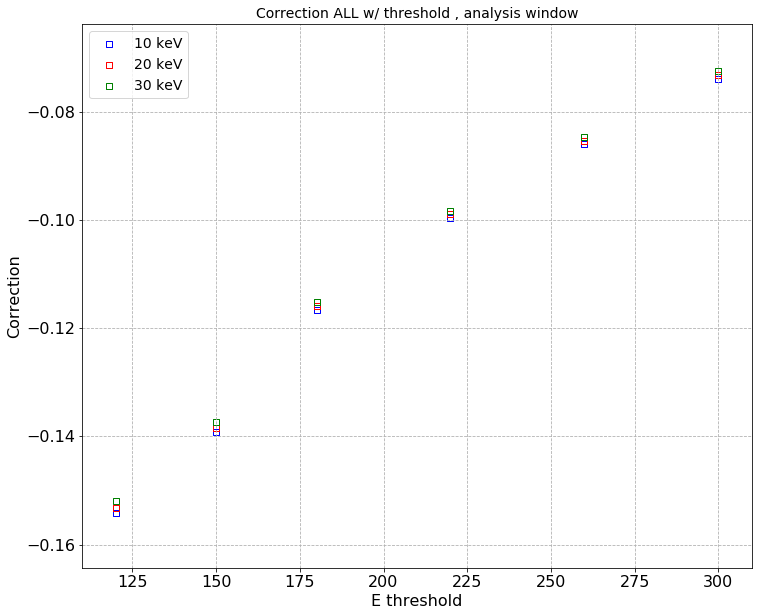

In [68]:
#aNoMis["3"]
#transposed_aNoMis = np.array(list(aNoMis.values())).T
#transposed_aNoMis[:,0]
# Plotting
#plt.scatter(x=E_list, y=transposed_aNoMis[:, 0], alpha=0.7, marker='o', facecolors='none', edgecolors='blue', label='10 keV')
#
plt.figure(figsize=(12, 10))
#plt.scatter(x= E_list, y = aNoMis["1"],marker = 'o', facecolors='none', edgecolors='blue',label = 'Type 0 & type 110 keV')
#plt.scatter(x= E_list, y = aNoMis["2"],marker = 'o',  facecolors='none', edgecolors='red', label = '20 keV')
#plt.scatter(x= E_list, y = aNoMis["3"],marker = 'o',  facecolors='none', edgecolors='green',label = '30 keV')

#plt.scatter(x= E_list, y = aCorr["1"],marker = 's', facecolors='none', edgecolors='blue',label = 'MC 10 keV')
#plt.scatter(x= E_list, y = aCorr["2"],marker = 's',  facecolors='none', edgecolors='red', label = '20 keV')
#plt.scatter(x= E_list, y = aCorr["3"],marker = 's',  facecolors='none', edgecolors='green',label = '30 keV')

plt.scatter(x= E_list, y = correction["1"],marker = 's', facecolors='none', edgecolors='blue',label = '10 keV')
plt.scatter(x= E_list, y = correction["2"],marker = 's',  facecolors='none', edgecolors='red', label = '20 keV')
plt.scatter(x= E_list, y = correction["3"],marker = 's',  facecolors='none', edgecolors='green',label = '30 keV')


#plt.scatter(x= E_list, y = aMis["1"],alpha = 0.7,marker = 's', facecolors='none', edgecolors='blue',label = 'MisBs 10 keV')
#plt.scatter(x= E_list, y = aMis["2"],alpha = 0.7,marker = 's',  facecolors='none', edgecolors='red', label = '20 keV')
#plt.scatter(x= E_list, y = aMis["3"],alpha = 0.7,marker = 's',  facecolors='none', edgecolors='green',label = '30 keV')
#plt.axhline(y=-0.11732, color='black', linestyle='--', label='A_0')
#plt.ylim(-0.14,-0.04)
#plt.yticks(np.arange(-0.14,-0.10,0.002))
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(f"Correction", fontsize=16)
plt.xlabel('E threshold', fontsize = 16)
plt.title(f'Correction ALL w/ threshold , analysis window', fontsize = 14)
#plt.savefig(f'./mar/correction.png')


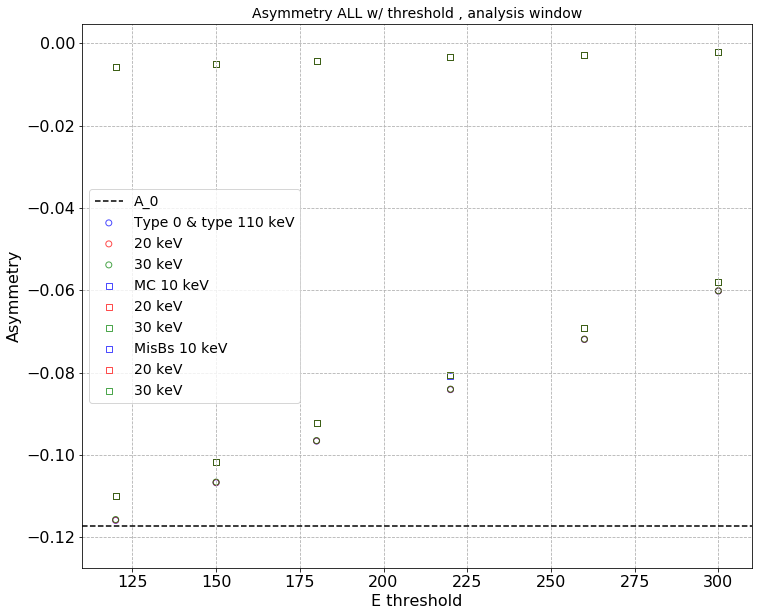

In [63]:
#aNoMis["3"]
#transposed_aNoMis = np.array(list(aNoMis.values())).T
#transposed_aNoMis[:,0]
# Plotting
#plt.scatter(x=E_list, y=transposed_aNoMis[:, 0], alpha=0.7, marker='o', facecolors='none', edgecolors='blue', label='10 keV')
#
plt.figure(figsize=(12, 10))
plt.scatter(x= E_list, y = aNoMis["1"],alpha = 0.7,marker = 'o', facecolors='none', edgecolors='blue',label = 'Type 0 & type 110 keV')
plt.scatter(x= E_list, y = aNoMis["2"],alpha = 0.7,marker = 'o',  facecolors='none', edgecolors='red', label = '20 keV')
plt.scatter(x= E_list, y = aNoMis["3"],alpha = 0.7,marker = 'o',  facecolors='none', edgecolors='green',label = '30 keV')

plt.scatter(x= E_list, y = aCorr["1"],alpha = 0.7,marker = 's', facecolors='none', edgecolors='blue',label = 'MC 10 keV')
plt.scatter(x= E_list, y = aCorr["2"],alpha = 0.7,marker = 's',  facecolors='none', edgecolors='red', label = '20 keV')
plt.scatter(x= E_list, y = aCorr["3"],alpha = 0.7,marker = 's',  facecolors='none', edgecolors='green',label = '30 keV')


plt.scatter(x= E_list, y = aMis["1"],alpha = 0.7,marker = 's', facecolors='none', edgecolors='blue',label = 'MisBs 10 keV')
plt.scatter(x= E_list, y = aMis["2"],alpha = 0.7,marker = 's',  facecolors='none', edgecolors='red', label = '20 keV')
plt.scatter(x= E_list, y = aMis["3"],alpha = 0.7,marker = 's',  facecolors='none', edgecolors='green',label = '30 keV')
plt.axhline(y=-0.11732, color='black', linestyle='--', label='A_0')
#plt.ylim(-0.14,-0.04)
#plt.yticks(np.arange(-0.14,-0.10,0.002))
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(f"Asymmetry", fontsize=16)
plt.xlabel('E threshold', fontsize = 16)
plt.title(f'Asymmetry ALL w/ threshold , analysis window', fontsize = 14)
plt.savefig(f'./feb/ethr-root-misid-events/asymEVERYTHINGThrehX.png')


In [66]:
print(correction["1"])
print(correction["2"])
print(correction["3"])

[0.06162335468582649, 0.13264452787277983, 0.21293615463369964, 0.31183857223373174, 0.41037318779771637, 0.5050991963808894]
[0.06184025198228063, 0.13277774588277927, 0.2131232024338574, 0.3120697595623183, 0.41053880297113277, 0.5052810264571436]
[0.06229330492755334, 0.13323482131857775, 0.21329222623661964, 0.3122608223429072, 0.41068093238714515, 0.5053866793373714]


In [67]:
correctionWin1 = [0.06162335468582649, 0.06184025198228063, 0.06229330492755334]
correctionWin2 = [0.13264452787277983, 0.13277774588277927, 0.13323482131857775]
correctionWin3 = [0.21293615463369964,0.2131232024338574 ,0.21329222623661964 ]
correctionWin4 = [0.31183857223373174, 0.3120697595623183, 0.3122608223429072]
correctionWin5 = [0.41037318779771637, 0.41053880297113277, 0.41068093238714515]
correctionWin6 = [0.5050991963808894, 0.5052810264571436, 0.5053866793373714]

In [70]:
colors = sns.color_palette("husl", 7)
colors

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7757319041862729, 0.5784925270759935, 0.19475566538551875),
 (0.5105309046900421, 0.6614299289084904, 0.1930849118538962),
 (0.20433460114757862, 0.6863857739476534, 0.5407103379425205),
 (0.21662978923073606, 0.6676586160122123, 0.7318695594345369),
 (0.5049017849530067, 0.5909119231215284, 0.9584657252128558),
 (0.9587050080494409, 0.3662259565791742, 0.9231469575614251)]

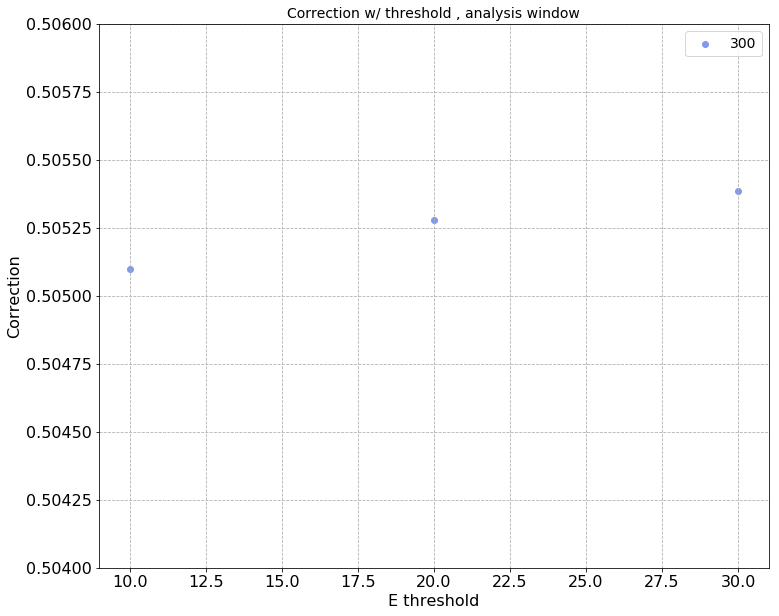

In [93]:
#aNoMis["3"]
#transposed_aNoMis = np.array(list(aNoMis.values())).T
#transposed_aNoMis[:,0]
# Plotting
#plt.scatter(x=E_list, y=transposed_aNoMis[:, 0], alpha=0.7, marker='o', facecolors='none', edgecolors='blue', label='10 keV')
#
plt.figure(figsize=(12, 10))
#plt.scatter(x= [10,20,30], y = correctionWin1,marker = 'o',color=colors[0],label = '120')
#plt.scatter(x= [10,20,30], y = correctionWin2,marker = 'o',color=colors[1],label = '150')
#plt.scatter(x= [10,20,30], y = correctionWin3,marker = 'o',color=colors[2],label = '180')
#plt.scatter(x= [10,20,30], y = correctionWin4,marker = 'o',color=colors[3],label = '220')
#plt.scatter(x= [10,20,30], y = correctionWin5,marker = 'o',color=colors[4],label = '260')
plt.scatter(x= [10,20,30], y = correctionWin6,marker = 'o',color=colors[5],label = '300')

#plt.yscale('log')
plt.ylim(0.504,0.506)
#plt.yticks(np.arange(-0.14,-0.10,0.002))
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(f"Correction", fontsize=16)
plt.xlabel('E threshold', fontsize = 16)
plt.title(f'Correction w/ threshold , analysis window', fontsize = 14)
plt.savefig(f'./feb/ethr-root-misid-eventsCorrection6.png')


In [126]:
#ucna+
#r_0 : 0.9757276105941303, r1 : 0.01629237508947745
#A_total : -0.043483175185658585, correction : 0.7489424065493153
#r_0 : 0.9757276105941303, r1 : 0.01629237508947745
#A_total : -0.04430096416084123, correction : 0.7442207611960668
#r_0 : 0.9757276105941303, r1 : 0.01629237508947745
#A_total : -0.04501564479125022, correction : 0.7400944296117192
#------------------------------------------------------
#r_0 : 0.9694333457408733, r1 : 0.015082571224051539
#A_total : -0.04312634409864666, correction : 0.7510026322249038
#r_0 : 0.9694333457408733, r1 : 0.015082571224051539
#A_total : -0.043936761388881605, correction : 0.7463235485630392
#r_0 : 0.9694333457408733, r1 : 0.015082571224051539
#A_total : -0.04464576667440659, correction : 0.7422299845588534
#----------------------------------
#r_0 : 0.9610405039370079, r1 : 0.013823244094488188
#A_total : -0.04267975005552554, correction : 0.7535811197717924
#r_0 : 0.9610405039370079, r1 : 0.013823244094488188
#A_total : -0.043483403982103014, correction : 0.7489410855536778
#r_0 : 0.9610405039370079, r1 : 0.013823244094488188
#A_total : -0.04418981032414706, correction : 0.7448625269968414

In [153]:
aTotucnaP1 = [-0.043483175185658585, -0.04430096416084123, -0.04501564479125022]
aTotucnaP2 = [-0.04312634409864666 , -0.043936761388881605, -0.04464576667440659]
aTotucnaP3 = [ -0.04267975005552554,  -0.043483403982103014, -0.04418981032414706]

In [24]:
a = 0
for i, key in enumerate(ucna_df.keys()):
    for j in range(3):
        a, delta = aTot(ucna_df[key], aMeas0_ucna[3*i + j], aMeas1_ucna[3*i + j])
        print(f'A_total : {a}, correction : {delta}')


r_0 : 0.9403459527559055, r1 : 0.01288542877594846
A_total : -0.04280181616940626, correction : 0.6351703360943892
r_0 : 0.9403459527559055, r1 : 0.01288542877594846
A_total : -0.04347557338469635, correction : 0.6294274344979854
r_0 : 0.9403459527559055, r1 : 0.01288542877594846
A_total : -0.04476874003647153, correction : 0.6184048752431679
r_0 : 0.9367740816034359, r1 : 0.012276764495347172
A_total : -0.042606102681101016, correction : 0.6368385383472467
r_0 : 0.9367740816034359, r1 : 0.012276764495347172
A_total : -0.04328434046396946, correction : 0.6310574457554597
r_0 : 0.9367740816034359, r1 : 0.012276764495347172
A_total : -0.04457557684399915, correction : 0.6200513395499562
r_0 : 0.9310597451682177, r1 : 0.011520229062276306
A_total : -0.04230667092490683, correction : 0.6393908035722228
r_0 : 0.9310597451682177, r1 : 0.011520229062276306
A_total : -0.04297039490145104, correction : 0.6337334222515254
r_0 : 0.9310597451682177, r1 : 0.011520229062276306
A_total : -0.044254749

In [125]:
#ucna
r_0 : 0.9403459527559055, r1 : 0.01288542877594846
A_total : -0.04280181616940626, correction : 0.7528763500611648
r_0 : 0.9403459527559055, r1 : 0.01288542877594846
A_total : -0.04347557338469635, correction : 0.7489862968551019
r_0 : 0.9403459527559055, r1 : 0.01288542877594846
A_total : -0.04476874003647153, correction : 0.7415199766947371
#-----------------------------------------------------
r_0 : 0.9367740816034359, r1 : 0.012276764495347172
A_total : -0.042606102681101016, correction : 0.754006335559463
r_0 : 0.9367740816034359, r1 : 0.012276764495347172
A_total : -0.04328434046396946, correction : 0.7500904130255805
r_0 : 0.9367740816034359, r1 : 0.012276764495347172
A_total : -0.04457557684399915, correction : 0.7426352376212519
#-----------------------------------------------------
r_0 : 0.9310597451682177, r1 : 0.011520229062276306
A_total : -0.04230667092490683, correction : 0.7557351563227088
r_0 : 0.9310597451682177, r1 : 0.011520229062276306
A_total : -0.04297039490145104, correction : 0.7519030317468184
r_0 : 0.9310597451682177, r1 : 0.011520229062276306
A_total : -0.04425474946367455, correction : 0.7444875897016481

In [82]:
aFor1_UCNAp_wMisid = [-0.1269860534315764, -0.12617516, -0.1250946110534092]
aFor2_UCNAp_wMisid = [-0.1258174801009109, -0.12499959, -0.1239232396477956]
aFor3_UCNAp_wMisid = [-0.1246235454651391, -0.12382252, -0.12276280718428337]
aFor4_UCNAp_wMisid = [-0.1238675737864081, -0.12305846, -0.12201018305087183]

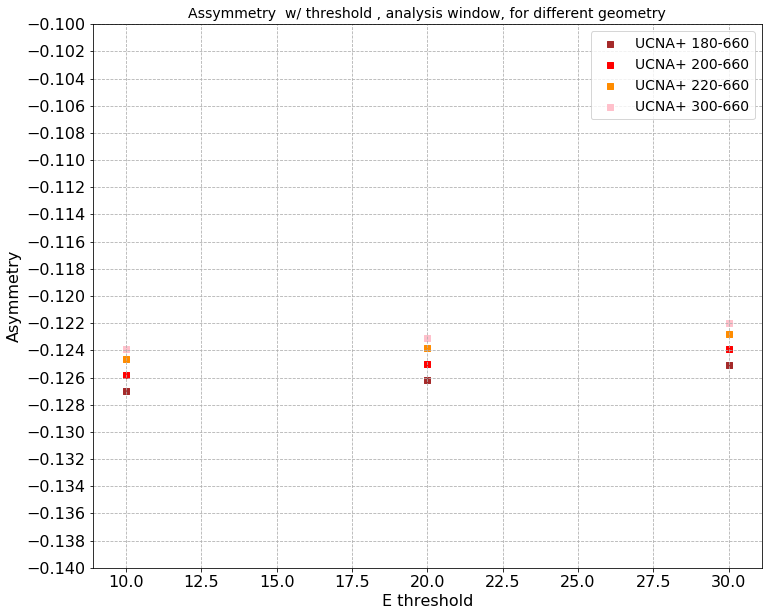

In [91]:
plt.figure(figsize=(12, 10))
plt.scatter(x= eThr, y = aFor1_UCNAp_wMisid,marker = 's', c = 'brown', label = 'UCNA+ 180-660')
plt.scatter(x= eThr, y = aFor2_UCNAp_wMisid,marker = 's', c = 'red', label = 'UCNA+ 200-660')
plt.scatter(x= eThr, y = aFor3_UCNAp_wMisid,marker = 's', c = 'darkorange',label = 'UCNA+ 220-660')
plt.scatter(x= eThr, y = aFor4_UCNAp_wMisid,marker = 's', c = 'pink',label = 'UCNA+ 300-660')

plt.ylim(-0.14,-0.10)
plt.yticks(np.arange(-0.14,-0.10,0.002))
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(f"Asymmetry", fontsize=16)
plt.xlabel('E threshold', fontsize = 16)
plt.title(f'Assymmetry  w/ threshold , analysis window, for different geometry', fontsize = 14)
#plt.savefig(f'./feb/ethr-root-misid-events/asymwthresholdanalysiswindowforgeometry.png')


In [79]:
#eThr = [10,20,30]
#corrWin1_UCNAp_wMisid = [-0.0823904 , -0.07547876, -0.066268420]
#corrWin2_UCNAp_wMisid = [-0.0724299 , -0.06545854, -0.056284006]
#corrWin3_UCNAp_wMisid = [-0.0622532 , -0.05542558, -0.046392833]
#corrWin4_UCNAp_wMisid = [-0.0558095 , -0.04891289, -0.039977693]

eThr = [10,20,30]
corrWin1_UCNAp_wMisid = [-0.0823904 , -0.07547876, -0.066268420]
corrWin2_UCNAp_wMisid = [-0.0724299 , -0.06545854, -0.056284006]
corrWin3_UCNAp_wMisid = [-0.0622532 , -0.05542558, -0.046392833]
corrWin4_UCNAp_wMisid = [-0.0558095 , -0.04891289, -0.039977693]

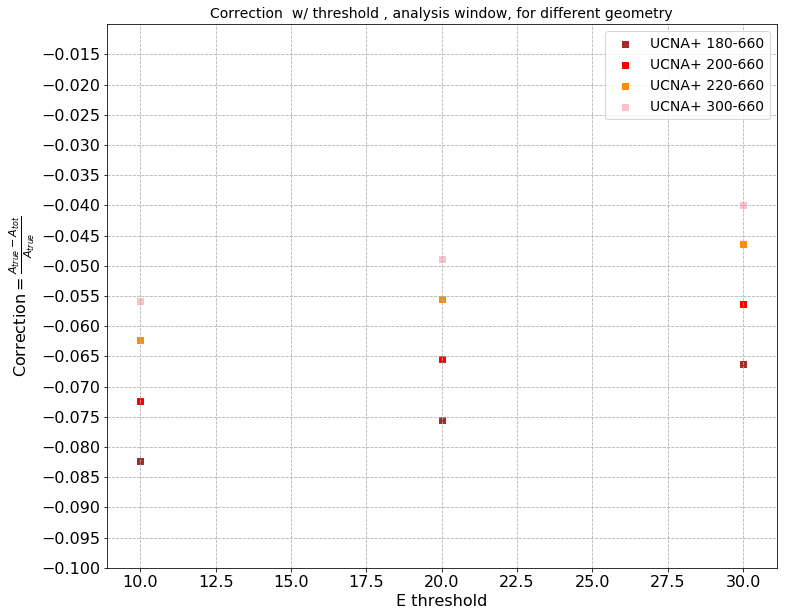

In [95]:
plt.figure(figsize=(12, 10))
plt.scatter(x= eThr, y = corrWin1_UCNAp_wMisid,marker = 's', c = 'brown', label = 'UCNA+ 180-660')
plt.scatter(x= eThr, y = corrWin2_UCNAp_wMisid,marker = 's', c = 'red', label = 'UCNA+ 200-660')
plt.scatter(x= eThr, y = corrWin3_UCNAp_wMisid,marker = 's', c = 'darkorange',label = 'UCNA+ 220-660')
plt.scatter(x= eThr, y = corrWin4_UCNAp_wMisid,marker = 's', c = 'pink',label = 'UCNA+ 300-660')

plt.ylim(-0.1,-0.01)
plt.yticks(np.arange(-0.1,-0.01,0.005))
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(r"Correction$ = \frac{A_{true}-A_{tot}}{A_{true}}$", fontsize=16)
plt.xlabel('E threshold', fontsize = 16)
plt.title(f'Correction  w/ threshold , analysis window, for different geometry', fontsize = 14)
#plt.savefig(f'./feb/ethr-root-misid-events/Correctionwthresholdanalysiswindowforgeometry.png')


In [80]:


eThr = [10,20,30]
corrWin1_UCNAp_wMisid = [-0.0823904 , -0.055425583819447226, -0.07539012026677464]
corrWin2_UCNAp_wMisid = [-0.0724299 ,-0.048912890339882435, -0.061521610566330986]
corrWin3_UCNAp_wMisid = [-0.0622532 , -0.07557926520460549, -0.04540188464160821]
corrWin4_UCNAp_wMisid = [-0.0558095 , -0.06540526236073747, -0.034952179839967755]
corrWin5_UCNAp_wMisid = [-0.0824530 , -0.05539620911298788, -0.07213291689690753]
corrWin6_UCNAp_wMisid = [-0.0722794 , -0.04892521516388431,  -0.060074741793408874]

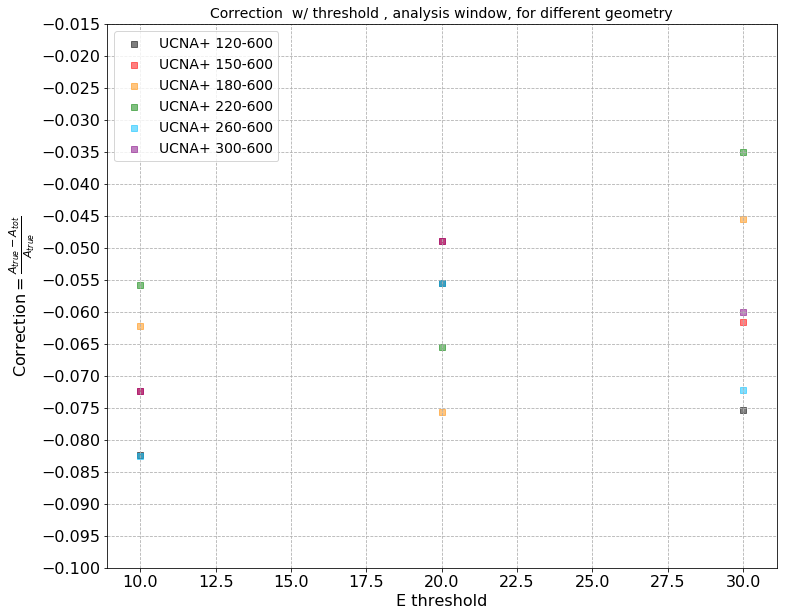

In [92]:
plt.figure(figsize=(12, 10))
plt.scatter(x= eThr, y = corrWin1_UCNAp_wMisid,marker = 's',alpha = 0.5, c = 'black', label = 'UCNA+ 120-600')
plt.scatter(x= eThr, y = corrWin2_UCNAp_wMisid,marker = 's',alpha = 0.5, c = 'red', label = 'UCNA+ 150-600')
plt.scatter(x= eThr, y = corrWin3_UCNAp_wMisid,marker = 's',alpha = 0.5, c = 'darkorange',label = 'UCNA+ 180-600')
plt.scatter(x= eThr, y = corrWin4_UCNAp_wMisid,marker = 's',alpha = 0.5, c = 'green',label = 'UCNA+ 220-600')
plt.scatter(x= eThr, y = corrWin5_UCNAp_wMisid,marker = 's',alpha = 0.5, c = 'deepskyblue',label = 'UCNA+ 260-600')
plt.scatter(x= eThr, y = corrWin6_UCNAp_wMisid,marker = 's',alpha = 0.5, c = 'purple',label = 'UCNA+ 300-600')

plt.ylim(-0.09,-0.03)
plt.yticks(np.arange(-0.1,-0.01,0.005))
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(r"Correction$ = \frac{A_{true}-A_{tot}}{A_{true}}$", fontsize=16)
plt.xlabel('E threshold', fontsize = 16)
plt.title(f'Correction  w/ threshold , analysis window, for different geometry', fontsize = 14)
plt.savefig(f'./feb/ethr-root-misid-events/marCorrectionwthresholdanalysiswindowforgeometry.png')


In [66]:
elambda = -1.2701
print(f'A_0{-2.*elambda*(1.+elambda)/(1.+3.*elambda*elambda)}')

A_0-0.11749507342887887


In [ ]:
plt.figure(figsize=(12, 10))
ethr =[10,20,30]
plt.scatter(x= ethr, y = corrWin1_UCNA, c = 'blue', marker = 'o',label = 'UCNA 180-660')
plt.scatter(x= ethr, y = corrWin2_UCNA, c = 'aquamarine', marker = 'o',label = 'UCNA 200-660')
plt.scatter(x= ethr, y = corrWin3_UCNA, c = 'darkorchid', marker = 'o',label = 'UCNA 220-660')

plt.scatter(x= ethr, y = corrWin1_UCNAp,marker = 's', c = 'brown', label = 'UCNA+ 180-660')
plt.scatter(x= ethr, y = corrWin2_UCNAp,marker = 's', c = 'red', label = 'UCNA+ 200-660')
plt.scatter(x= ethr, y = corrWin3_UCNAp,marker = 's', c = 'darkorange',label = 'UCNA+ 220-660')

plt.ylim(0.615,0.650)
plt.yticks(np.arange(0.615,0.650,0.002))
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(r"Correction$ = \frac{A_{true}-A_{tot}}{A_{true}}$", fontsize=16)
plt.xlabel('E threshold', fontsize = 16)
plt.title(f'Correction  w/ threshold , analysis window, for different geometry', fontsize = 14)
#plt.savefig(f'./feb/ethr-root/Correctionwthresholdanalysiswindowforgeometry.png')


In [146]:
ethr = [10,20,30]

In [26]:
corrWin1_UCNA = [ 0.6351703360943892, 0.6368385383472467,  0.6393908035722228]
corrWin2_UCNA = [ 0.6294274344979854, 0.6310574457554597 , 0.6337334222515254 ]
corrWin3_UCNA = [  0.6184048752431679, 0.6200513395499562, 0.6227859745680655]

In [25]:
corrWin1_UCNAp = [ 0.6293626390584846, 0.6324041587227527,0.6362107905256944 ]
corrWin2_UCNAp = [0.6223920545444832,  0.6254964082093283, 0.6293606888671751]
corrWin3_UCNAp = [ 0.6163003342034588,   0.6194530627820781, 0.6233394960437517
                  ]

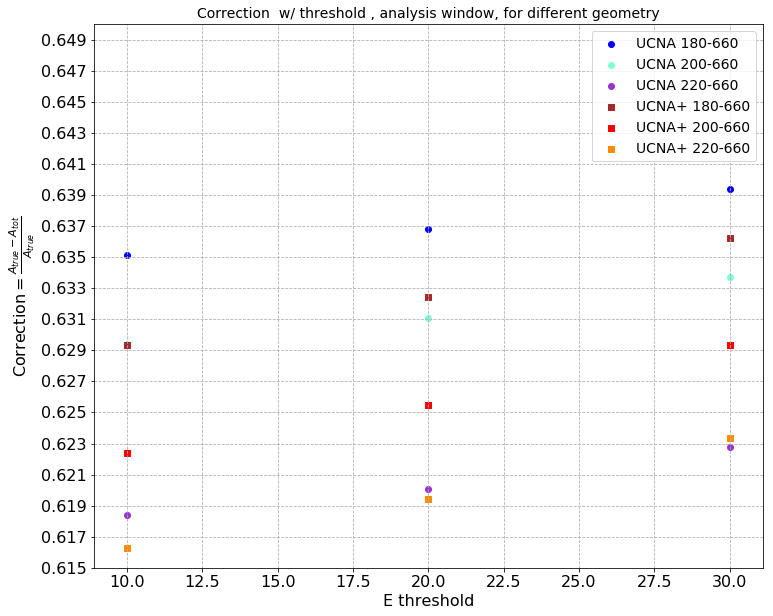

In [31]:
plt.figure(figsize=(12, 10))
ethr =[10,20,30]
plt.scatter(x= ethr, y = corrWin1_UCNA, c = 'blue', marker = 'o',label = 'UCNA 180-660')
plt.scatter(x= ethr, y = corrWin2_UCNA, c = 'aquamarine', marker = 'o',label = 'UCNA 200-660')
plt.scatter(x= ethr, y = corrWin3_UCNA, c = 'darkorchid', marker = 'o',label = 'UCNA 220-660')

plt.scatter(x= ethr, y = corrWin1_UCNAp,marker = 's', c = 'brown', label = 'UCNA+ 180-660')
plt.scatter(x= ethr, y = corrWin2_UCNAp,marker = 's', c = 'red', label = 'UCNA+ 200-660')
plt.scatter(x= ethr, y = corrWin3_UCNAp,marker = 's', c = 'darkorange',label = 'UCNA+ 220-660')

plt.ylim(0.615,0.650)
plt.yticks(np.arange(0.615,0.650,0.002))
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(r"Correction$ = \frac{A_{true}-A_{tot}}{A_{true}}$", fontsize=16)
plt.xlabel('E threshold', fontsize = 16)
plt.title(f'Correction  w/ threshold , analysis window, for different geometry', fontsize = 14)
#plt.savefig(f'./feb/ethr-root/Correctionwthresholdanalysiswindowforgeometry.png')


In [145]:
#a =[win1 , win2, win 3]
aTotucna1 = [ -0.04280181616940626,  -0.04347557338469635, -0.044768740036471]
aTotucna2 = [-0.042606102681101016,  -0.04328434046396946, -0.04457557684399915 ]
aTotucna3 = [ -0.04230667092490683,  -0.04297039490145104,   -0.04425474946367455]

In [167]:
aWin1UCNA = [aTotucna1[0],aTotucna2[0],aTotucna3[0]] 
aWin2UCNA = [aTotucna1[1],aTotucna2[1],aTotucna3[1]] 
aWin3UCNA = [aTotucna1[2],aTotucna2[2],aTotucna3[2]] 

In [168]:
aWin1UCNAp = [aTotucnaP1[0],aTotucnaP2[0],aTotucnaP3[0]] 
aWin2UCNAp = [aTotucnaP1[1],aTotucnaP2[1],aTotucnaP3[1]] 
aWin3UCNAp = [aTotucnaP1[2],aTotucnaP2[2],aTotucnaP3[2]] 

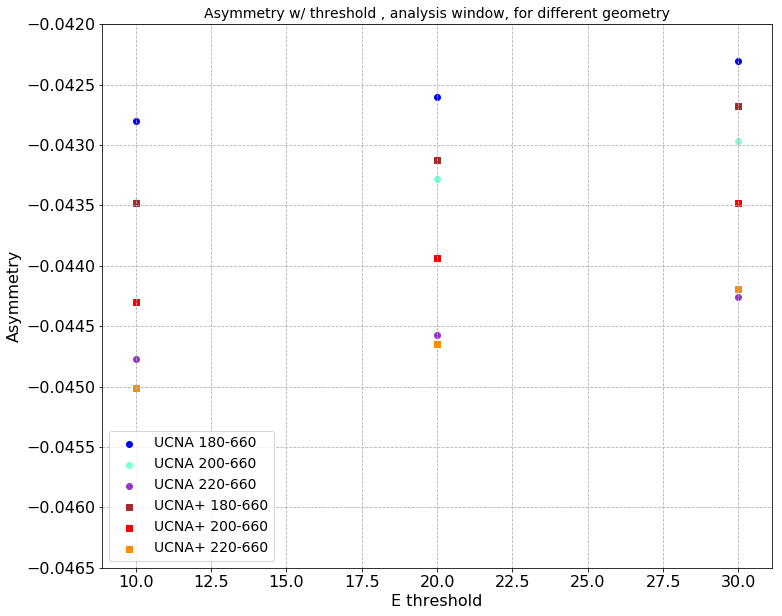

In [190]:
plt.figure(figsize=(12, 10))
x = [180,220,260]
plt.scatter(x= ethr, y = aWin1UCNA, c = 'blue', marker = 'o',label = 'UCNA 180-660')
plt.scatter(x= ethr, y = aWin2UCNA, c = 'aquamarine', marker = 'o',label = 'UCNA 200-660')
plt.scatter(x= ethr, y = aWin3UCNA, c = 'darkorchid', marker = 'o',label = 'UCNA 220-660')

plt.scatter(x= ethr, y = aWin1UCNAp,marker = 's', c = 'brown', label = 'UCNA+ 180-660')
plt.scatter(x= ethr, y = aWin2UCNAp,marker = 's', c = 'red', label = 'UCNA+ 200-660')
plt.scatter(x= ethr, y = aWin3UCNAp,marker = 's', c = 'darkorange',label = 'UCNA+ 220-660')

plt.ylim(-0.0465,-0.0420)
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel("Asymmetry", fontsize=16)
plt.xlabel('E threshold', fontsize = 16)
plt.title(f'Asymmetry w/ threshold , analysis window, for different geometry', fontsize = 14)
plt.savefig(f'./feb/ethr-root/AsymmetrywthresholdAnalysisWindowdiffeometry.png')


In [ ]:
plt.figure(figsize=(12, 10))

plt.scatter(x= ethr, y = aTotucna1, c = 'blue', marker = 'o',label = 'UCNA > 10 keV')
plt.scatter(x= ethr, y = aTotucna2, c = 'aquamarine', marker = 'o',label = 'UCNA > 20 keV')
plt.scatter(x= ethr, y = aTotucna3, c = 'darkorchid', marker = 'o',label = 'UCNA > 30 keV')

plt.scatter(x= ethr, y = aTotucnaP1,marker = 's', c = 'brown', label = 'UCNA+ > 10 keV')
plt.scatter(x= ethr, y = aTotucnaP2,marker = 's', c = 'red', label = 'UCNA+ > 20 keV')
plt.scatter(x= ethr, y = aTotucnaP3,marker = 's', c = 'darkorange',label = 'UCNA+ > 30 keV')

plt.ylim(-0.0455,-0.042)
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)

## correction

## count the dead events

In [130]:
def deadEvts(df):
    n01 = df["EdepType01;1"].sum()
    n11 = df["EdepType11;1"].sum()
    n02 = df["EdepType02;1"].sum()
    n12 = df["EdepType12;1"].sum()
    Ndead = NTot - (n01  + n02 +n11 + n12)
    
    return Ndead

In [134]:

for key in ucna_df.keys():
    nDead_ucna = deadEvts(ucna_df[key])
    nDead_ucnap = deadEvts(ucnaP_df[key])
    print(f'nDead_UCNA : {(nDead_ucna/NTot)*100}%, nDead_UCNA+ : {(nDead_ucnap/NTot)*100}%')

nDead_UCNA : 4.676861846814603%, nDead_UCNA+ : 0.7980014316392269%
nDead_UCNA : 5.09491539012169%, nDead_UCNA+ : 1.548408303507516%
nDead_UCNA : 5.7420025769506085%, nDead_UCNA+ : 2.513625196850394%


In [135]:
nDeadUCNA = [4.676861846814603, 5.09491539012169, 5.7420025769506085]
nDeadUCNAPlus = [0.7980014316392269, 1.548408303507516, 2.513625196850394 ] 

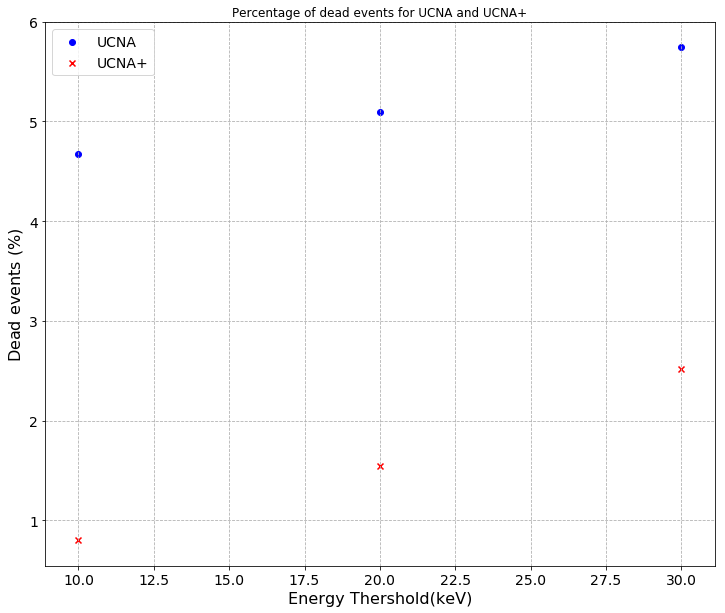

In [189]:
plt.figure(figsize=(12, 10))

plt.scatter(y = nDeadUCNA, x= [10,20,30], c = 'blue', marker = 'o', label ='UCNA')
plt.scatter(y = nDeadUCNAPlus, x = [10,20,30], c = 'red', marker = 'x', label = 'UCNA+')
plt.xlabel("Energy Thershold(keV)", fontsize=16)
plt.ylabel(r"Dead events ($\%$)", fontsize=16)
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Percentage of dead events for UCNA and UCNA+')   
plt.savefig((f'./feb/ethr-root/PercentageDeadeventsUCNAandUCNA+.png'))

In [47]:
ucnaP_df['3'].columns

Index(['EdepType01;1', 'EdepType11;1', 'EdepType02;1', 'EdepType12;1',
       'EdepType0;1', 'EdepType1;1', 'EdepType01Thr0;1', 'EdepType11Thr0;1',
       'EdepType02Thr0;1', 'EdepType12Thr0;1', 'Evals', 'A_meas1',
       'errA_meas1', 'A_meas', 'errA_meas'],
      dtype='object')

## a from total rate

In [50]:
def a_tot_rate(df, col1, col2) : 
    N1 = df[col1].sum()
    N2 = df[col2].sum()
    print(f'N1 : {N1} , N2 : {N2}, N1+N2 : {N1+N2}')
    A = (N1-N2)/(N1+N2)
    errA = A*np.sqrt((1/N1)+(1/N2))
    return A, errA

In [51]:
a0_ucna = []
a0_ucnap = []
a1_ucna = []
a1_ucnap = []
err_a0_ucna = []
err_a0_ucnap = []
err_a1_ucna = []
err_a1_ucnap = []
for key in ucna_df.keys():
    a0  , erra0 = a_tot_rate(ucna_df[key], "EdepType01;1", "EdepType02;1")
    a1  , erra01= a_tot_rate(ucna_df[key], "EdepType11;1", "EdepType12;1")


    a0_P  , erra0_p = a_tot_rate(ucnaP_df[key], "EdepType01;1", "EdepType02;1")
    a1_P  , erra01_p= a_tot_rate(ucnaP_df[key], "EdepType11;1", "EdepType12;1")
#    a0_ucna.append(a0)
#    a0_ucnap.append(a0_P)
#    a1_ucna.append(a1) 
#    a1_ucnap.append(a1_P)
#    err_a0_ucna.append(erra0) 
#    err_a0_ucnap.append(erra0_p)
#    err_a1_ucna.append(erra01)
#    err_a1_ucnap.append(erra01_p) 


N1 : 78012909.0 , N2 : 86323239.0, N1+N2 : 164336148.0
N1 : 543078.0 , N2 : 581981.0, N1+N2 : 1125059.0
N1 : 92841008.0 , N2 : 102545661.0, N1+N2 : 195386669.0
N1 : 786840.0 , N2 : 843721.0, N1+N2 : 1630561.0
N1 : 77863662.0 , N2 : 86160617.0, N1+N2 : 164024279.0
N1 : 517231.0 , N2 : 554684.0, N1+N2 : 1071915.0
N1 : 92544988.0 , N2 : 102212591.0, N1+N2 : 194757579.0
N1 : 727481.0 , N2 : 782081.0, N1+N2 : 1509562.0
N1 : 77625553.0 , N2 : 85899793.0, N1+N2 : 163525346.0
N1 : 485051.0 , N2 : 520809.0, N1+N2 : 1005860.0
N1 : 92145008.0 , N2 : 101773757.0, N1+N2 : 193918765.0
N1 : 666099.0 , N2 : 717409.0, N1+N2 : 1383508.0


In [53]:
Nucna - 164336148.0 + 1125059.0

NameError: name 'Nucna' is not defined

## asymmetry for total rate

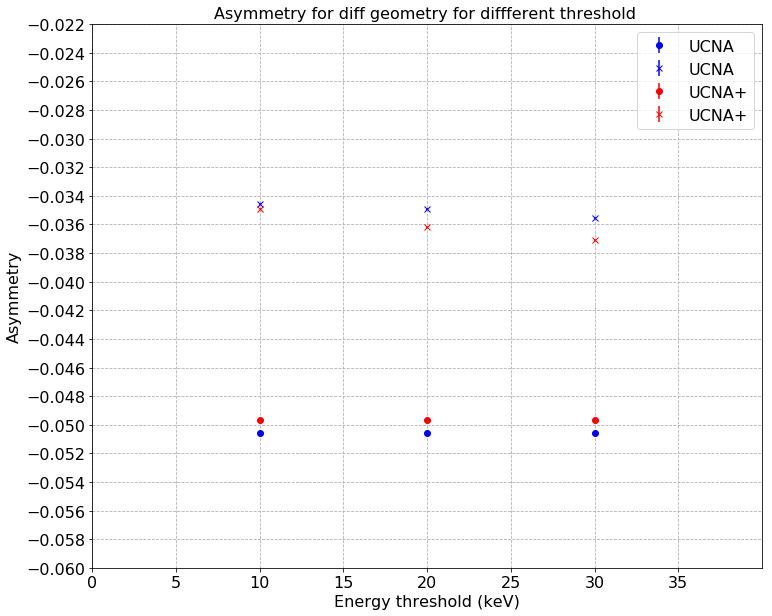

In [41]:
e = np.arange(10,40,10)
plt.figure(figsize=(12, 10))

plt.errorbar(x = e, y = a0_ucna, yerr = err_a0_ucna, color = 'blue', label = 'UCNA', fmt = 'o')
plt.errorbar(x = e, y = a1_ucna, yerr = err_a1_ucna, color = 'blue', label = 'UCNA', fmt = 'x')

plt.errorbar(x = e, y = a0_ucnap, yerr = err_a0_ucnap, color = 'red', label = 'UCNA+' ,fmt = 'o')
plt.errorbar(x = e, y = a1_ucnap, yerr = err_a1_ucnap, color = 'red', label = 'UCNA+' ,fmt = 'x')
plt.xlabel("Energy threshold (keV)", fontsize=16)
plt.ylabel("Asymmetry", fontsize=16)
#plt.ylim(-0., 0.1)
plt.xlim(0, 40)
plt.yticks(np.arange(-0.06, -0.02, 0.002), fontsize=16)
plt.xticks(np.arange(0, 40, 5), fontsize=16)
plt.grid(linestyle='--')
plt.legend(fontsize = 16)
plt.title(f"Asymmetry for diff geometry for diffferent threshold ", fontsize=16)
plt.savefig('./AsymmetryGeometryDiffferentThreshold.png')
        

In [137]:
cna_df['1']['A_meas'].isna().sum()

253

(160, 17)
(160, 17)
(160, 17)


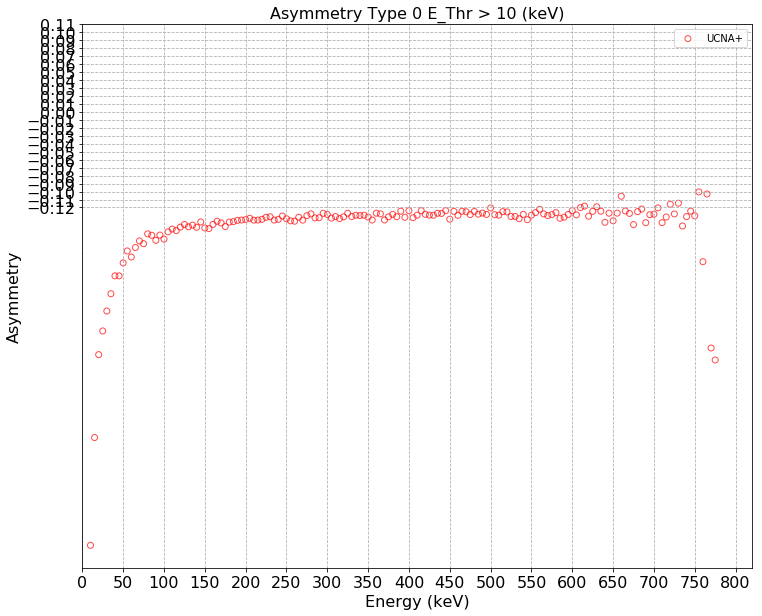

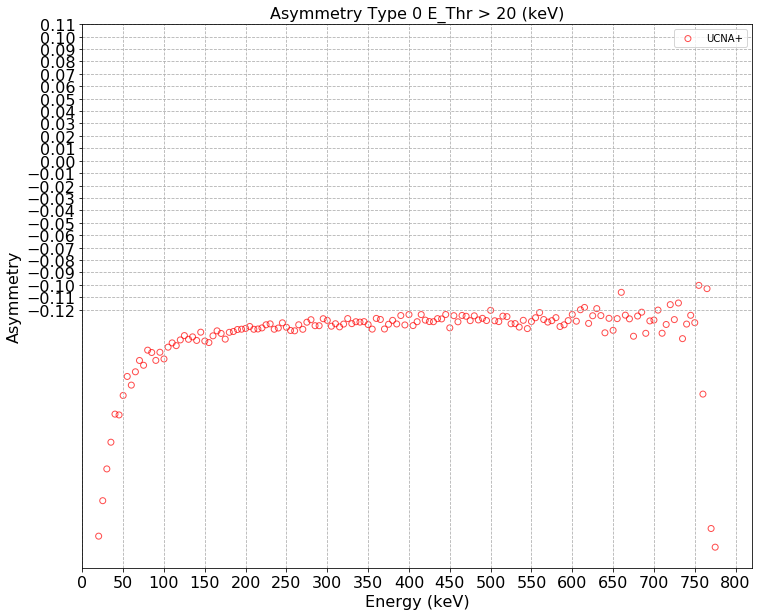

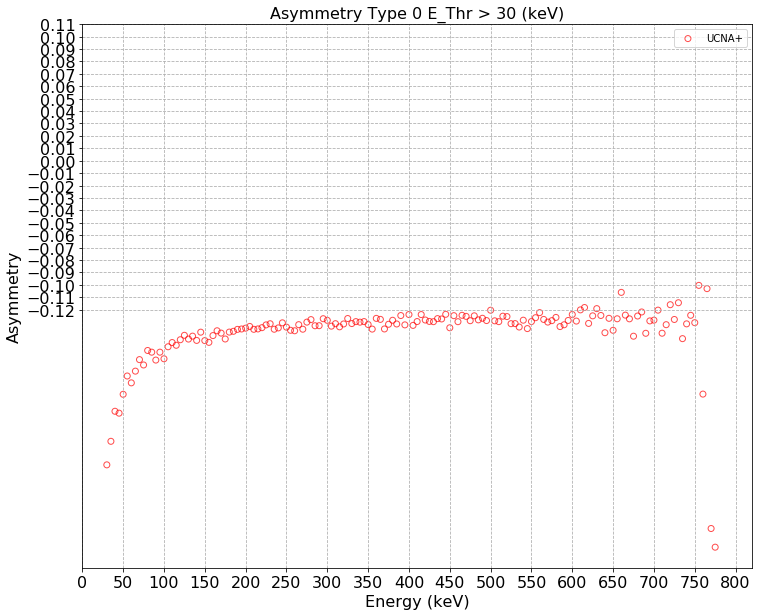

In [13]:
for key in ucnaP_df.keys():
    print(ucnaP_df[key].shape)
 #   print(ucna_df[key].shape) 
    ucnap_item = ucnaP_df[key]
 #   ucna_item = ucna_df[key]
    plt.figure(figsize=(12, 10))

    # Assuming "Evals" is a column in your DataFrame
#    plt.scatter(x=ucna_item["Evals"] , y=ucna_item["A_meas"] ,alpha = 0.7,  marker='X', facecolors='none', edgecolors='blue',label='UCNA')
    plt.scatter(x=ucnap_item["Evals"], y=ucnap_item["a_type0"],alpha = 0.7,  marker='o', facecolors='none', edgecolors='red',label='UCNA+')

    plt.xlabel("Energy (keV)", fontsize=16)
    plt.ylabel("Asymmetry", fontsize=16)
    plt.title(f"Asymmetry Type 0 E_Thr > {key}0 (keV)", fontsize=16)
#    plt.ylim(-0.12, 0.12)
    plt.xlim(0, 820)
    plt.yticks(np.arange(-0.12, 0.12, 0.01), fontsize=16)
    plt.xticks(np.arange(0, 820, 50), fontsize=16)
    plt.grid(linestyle='--')

    # Add a legend if needed
    plt.legend()
   
    #plt.savefig(f'./feb/ethr-root/aymmetryType0{str(key)}.png')
       #  ucnap_item = asymm_meas(ucnaP_df[key])
  #  ucna_item = asymm_meas(ucna_df[key])


In [76]:
for key in ucnaP_df.keys():
    print(ucnaP_df[key].shape)
    print(ucna_df[key].shape)


(8000, 15)
(8000, 15)
(8000, 15)
(8000, 15)
(8000, 15)
(8000, 15)


In [ ]:
for key in ucnaP_df.keys():
   # print(ucnaP_df[key].shape)
   # print(ucna_df[key].shape) 
    ucnap_item = ucnaP_df[key]
    ucna_item = ucna_df[key]
    plt.figure(figsize=(12, 10))

    # Assuming "Evals" is a column in your DataFrame
    plt.scatter(x=ucna_item["Evals"] , y=ucna_item["A_meas1"] ,alpha = 0.7,  marker='X', facecolors='none', edgecolors='blue',label='UCNA')
    plt.scatter(x=ucnap_item["Evals"], y=ucnap_item["A_meas1"],alpha = 0.7,  marker='o', facecolors='none', edgecolors='red',label='UCNA+')

    plt.xlabel("Energy (keV)", fontsize=16)
    plt.ylabel("Asymmetry", fontsize=16)
    plt.title(f"Asymmetry Type 1 E_Thr > {key}0 (keV)", fontsize=16)
    plt.ylim(-1.5, 1.5)
    plt.xlim(0, 820)
    plt.yticks(np.arange(-1.5, 1.5, 0.1), fontsize=16)
    plt.xticks(np.arange(0, 820, 50), fontsize=16)
    plt.grid(linestyle='--')

    # Add a legend if needed
    plt.legend()
   
    plt.savefig(f'./feb/ethr-root/aymmetryType1{str(key)}.png')
       #  ucnap_item = asymm_meas(ucnaP_df[key])
  #  ucna_item = asymm_meas(ucna_df[key])


## ucna-df defn

In [11]:
ucna_df = {}
for file_num, file_path in ucna.items():
    # Open the ROOT file using uproot
    print(f'file_num : {file_num}')
    with uproot.open(file_path) as file:
        # Access the TTree within the file (replace "tree_name" with the actual tree name)
     #   tree = file["tree_name"]

        # Initialize dictionaries to store results
        content_dict = {}
        edge_dict = {}

        # Loop through the list of keys
        for key in keys:
            # Access the specific branch using the key
            branch = file[key]

            # Extract values and edges
            nVal = branch.values()
            nEdge = branch.axis().edges()[:-1]

            # Store results in dictionaries
            content_dict[key] = nVal
            edge_dict[key] = nEdge

        # Create DataFrames from the dictionaries
        values_df = pd.DataFrame(content_dict)
        edge_df = pd.DataFrame(edge_dict)

        # Take one column from edge_df and rename it
        select_edge_col = edge_df['EdepType01;1'].rename('Evals')

        # Concatenate values_df and select_edge_col
        ucna_df[file_num] = pd.concat([values_df, select_edge_col], axis=1)

        # Delete temporary DataFrames to free up memory
        del values_df, edge_df, select_edge_col


file_num : 1
file_num : 2
file_num : 3


In [60]:
for key1, df1 in ucnaP_df.items():
    for key2, df2 in ucnaP_df.items():
        if key1 != key2:
            if df1.equals(df2):
                print(f"{key1} and {key2} are exactly the same.")
            else:
                print(f"{key1} and {key2} are different.")

1 and 2 are different.
1 and 3 are different.
2 and 1 are different.
2 and 3 are different.
3 and 1 are different.
3 and 2 are different.


In [54]:

Nucna= 8.73125e+07
NucnaP = 1e+08

## NTot

In [24]:

NTot= 8.73125e+07
#NucnaP = 1e+08

## Type 0 spectra ucna and ucna+

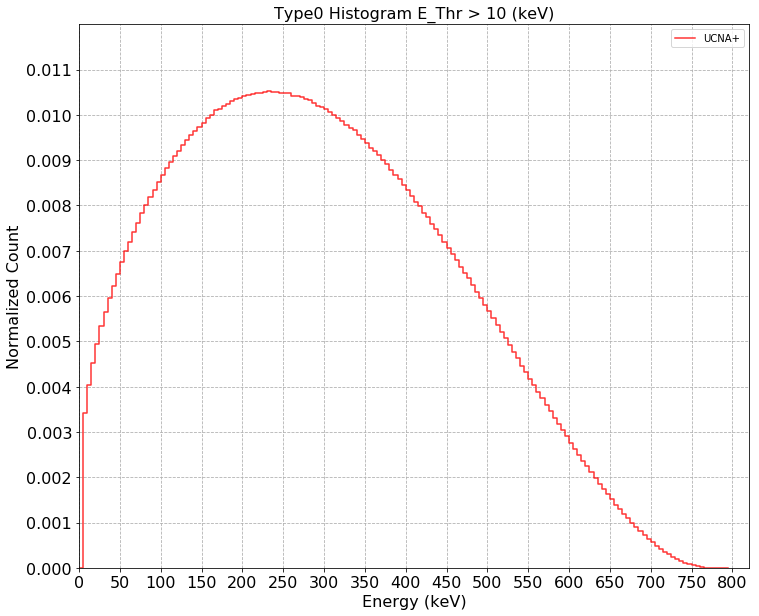

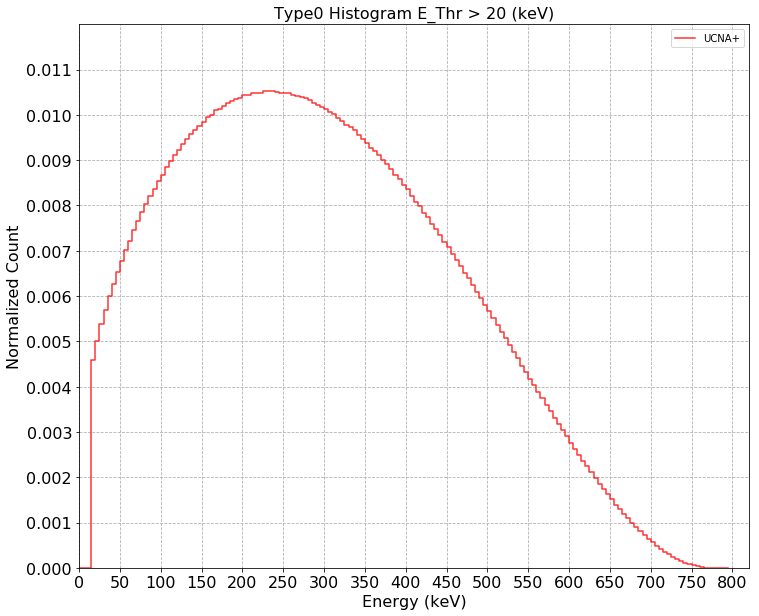

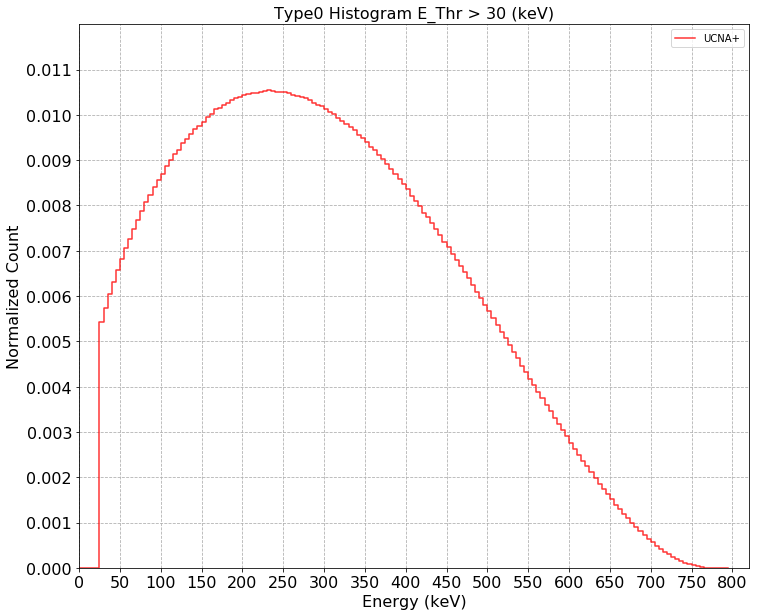

In [15]:
for key in ucnaP_df.keys():
    ucnap_item = ucnaP_df[key]
   # ucna_item = ucna_df[key]

    plt.figure(figsize=(12, 10))

    # Assuming "Evals" is a column in your DataFrame
   # plt.step(x=ucna_item["Evals"], y=ucna_item["EdepType0;1"] / NTot, c='blue'  ,alpha = 0.8, label='UCNA')
    plt.step(x=ucnap_item["Evals"], y=ucnap_item["EdepType0;1"] / nEvents, c='red',alpha = 0.8, label='UCNA+')

    plt.xlabel("Energy (keV)", fontsize=16)
    plt.ylabel("Normalized Count", fontsize=16)
    plt.title(f"Type0 Histogram E_Thr > {key}0 (keV)", fontsize=16)
    plt.ylim(0.0, 0.012)
    plt.yticks(np.arange(0, 0.012, 0.001), fontsize=16)
    plt.xlim(0, 820)
    plt.xticks(np.arange(0, 820, 50), fontsize=16)
    plt.grid(linestyle='--')

    # Add a legend if needed
    plt.legend()
    plt.savefig(f'./mar/type0ucnaP5keVbw{str(key)}.png')
  

In [55]:
ucnaPmis_df[key] 

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7995    0.0
7996    0.0
7997    0.0
7998    0.0
7999    0.0
Name: misEdepType01;1, Length: 8000, dtype: float64

type 0 misid spectra

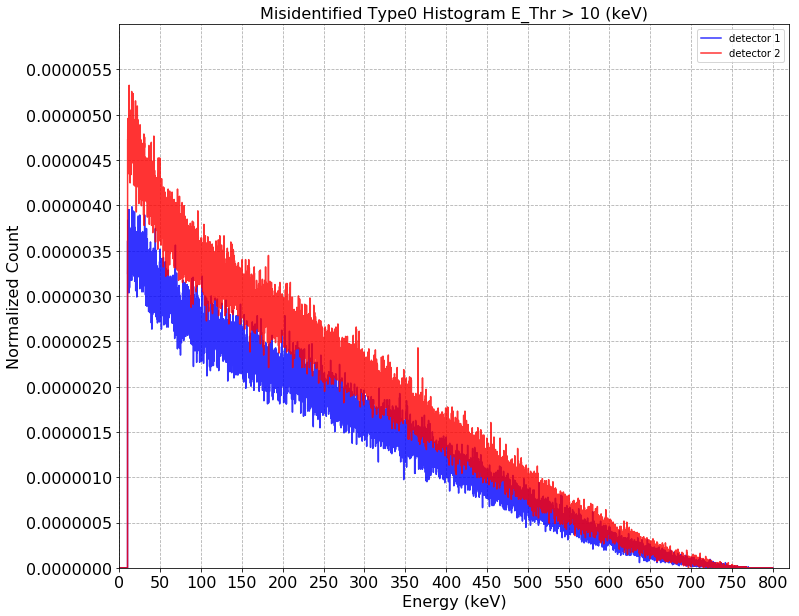

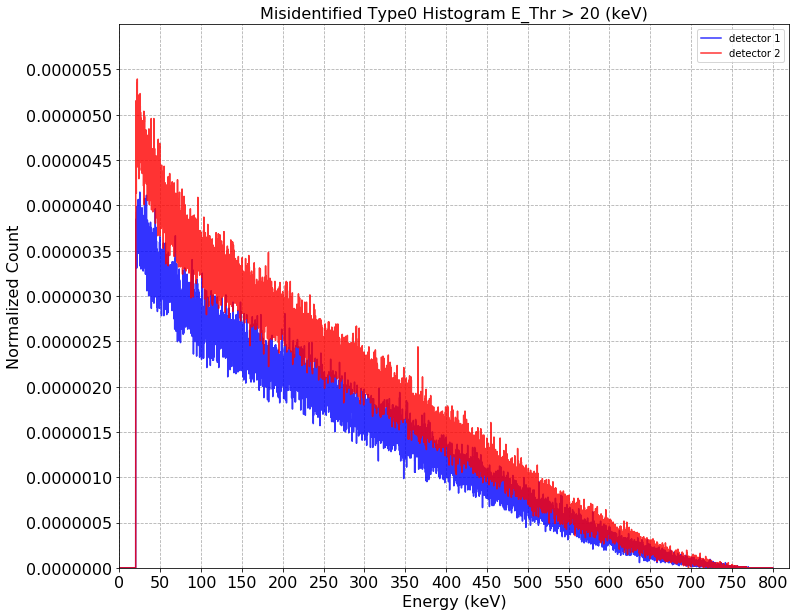

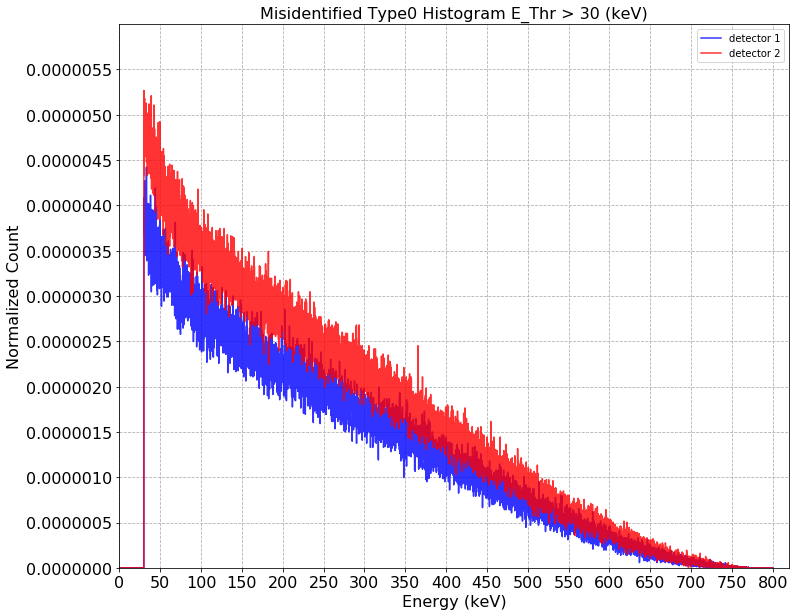

In [60]:
for key in ucnaPmis_df.keys():
    ucnaPmis = ucnaPmis_df[key]
  #
    plt.figure(figsize=(12, 10))

    # Assuming "Evals" is a column in your DataFrame
    plt.step(x=ucnaPmis["Evals"], y=ucnaPmis["misEdepType01;1"] / NTot, c='blue',alpha = 0.8, label='detector 1')
    plt.step(x=ucnaPmis["Evals"], y=ucnaPmis["misEdepType02;1"] / NTot, c='red' ,alpha = 0.8, label='detector 2')

    plt.xlabel("Energy (keV)", fontsize=16)
    plt.ylabel("Normalized Count", fontsize=16)
    plt.title(f"Misidentified Type0 Histogram E_Thr > {key}0 (keV)", fontsize=16)
    plt.ylim(0.0, 0.000006)
    plt.xlim(0, 820)
    plt.yticks(np.arange(0, 0.000006, 0.0000005), fontsize=16)
    plt.xticks(np.arange(0, 820, 50), fontsize=16)
    plt.grid(linestyle='--')

    # Add a legend if needed
    plt.legend()
    plt.savefig(f'./feb/ethr-root-misid-events/marMisIdtype0ucnaP{str(key)}.png')
  

## type 1 spectra ucna and ucna+

In [ ]:
for key in ucnaP_df.keys():
    ucnap_item = ucnaP_df[key]
    ucna_item = ucna_df[key]

    plt.figure(figsize=(12, 10))

    # Assuming "Evals" is a column in your DataFrame
    plt.step(x=ucnap_item["Evals"], y=ucnap_item["EdepType1;1"] / NTot,alpha = 0.7, c='red', label='UCNA+')
    plt.step(x=ucna_item["Evals"],  y=ucna_item["EdepType1;1"] / NTot  ,alpha = 0.7, c='blue', label='UCNA')

    plt.xlabel("Energy (keV)", fontsize=16)
    plt.ylabel("Normalized Count", fontsize=16)
    plt.title(f"Type1 Histogram E_Thr > {key}0 (keV)", fontsize=16)
    plt.xlim(0, 820)
    plt.ylim(0.0, 0.000007)
    plt.yticks(np.arange(0, 0.000007, 0.0000005), fontsize=16)
    plt.xticks(np.arange(0, 820, 50), fontsize=16)
    plt.grid(linestyle='--')

    # Add a legend if needed
    plt.legend()
    plt.savefig(f'./feb/ethr-root/type1ucnaanducnaP{str(key)}.png')
  

In [ ]:
for key in ucnaP_df.keys():
    ucnap_item = ucnaP_df[key]
    ucna_item = ucna_df[key]

    plt.figure(figsize=(12, 10))

    # Assuming "Evals" is a column in your DataFrame
    plt.step(x=ucna_item["Evals"], y=ucna_item["EdepType0;1"] / Nucna, c='blue'  ,alpha = 0.8, label='UCNA')
    plt.step(x=ucnap_item["Evals"], y=ucnap_item["EdepType0;1"] / NucnaP, c='red',alpha = 0.8, label='UCNA+')

    plt.xlabel("Energy (keV)", fontsize=16)
    plt.ylabel("Normalized Count", fontsize=16)
    plt.title(f"Type0 Histogram E_Thr > {key}0 (keV)", fontsize=16)
    plt.ylim(0.0, 0.00025)
    plt.xlim(0, 820)
    plt.yticks(np.arange(0, 0.00025, 0.00001), fontsize=16)
    plt.xticks(np.arange(0, 820, 50), fontsize=16)
    plt.grid(linestyle='--')

    # Add a legend if needed
    plt.legend()
    plt.savefig(f'./feb/ethr-rootfiles/type0ucnaanducnaP{str(key)}.png')
  

In [ ]:

ucnaP_df={}
for file_num, ucna_obj in ucnaP.items() : 
    print(ucna_obj)
    content_dict = {}
    edge_dict = {}

    for key in keys:
        branch = ucna_obj[key]
        nVal = branch.array()
        nEdge = branch.axis().edges()[:-1]

    #storing the values in the dictionary
        content_dict[key] = nVal
        edge_dict[key] = nEdge

    values_df = pd.DataFrame(content_dict)
    edge_df = pd.DataFrame(edge_dict)
    select_edge_col = edge_df['EdepType01;1'].rename('Evals')
    ucnaP[file_num] = pd.concat([values_df, select_edge_col], axis = 1)
    del values_df, edge_df, select_edge_col



## Dead Events - deposited 0 energy

In [ ]:
for key in ucnap_df.keys():
    # energy deposited in both the detector is zero. - sum that event
    x_df = ucnaP_df[key]
    x_df["EdepType01;1"] == 0 & x_df["EdepType02;1"] == 0

In [67]:
ucnaP_df["1"]["EdepType0;1"].sum()

837209.0

(0, 100)

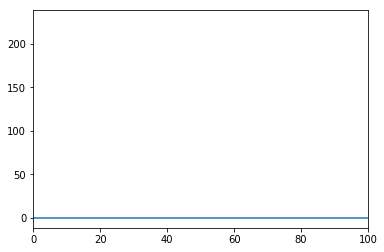

In [81]:
plt.plot(ucnaP_df["1"]["EdepType11;1"])
plt.xlim(0,100)

checking something

In [8]:
ucnaP_df["1"].head(100)

,EdepType01;1,EdepType11;1,EdepType02;1,EdepType12;1,EdepType0;1,EdepType1;1,EdepType01Thr0;1,EdepType11Thr0;1,EdepType02Thr0;1,EdepType12Thr0;1,Evals
0,7.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
2,18.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
3,9.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3
4,10.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4
...,...,...,...,...,...,...,...,...,...,...,...
95,2811.0,0.0,3075.0,0.0,0.0,0.0,0.0,19.0,0.0,17.0,9.5
96,2718.0,0.0,2987.0,0.0,0.0,0.0,0.0,17.0,0.0,15.0,9.6
97,2607.0,0.0,3113.0,0.0,0.0,0.0,0.0,15.0,0.0,17.0,9.7
98,2680.0,0.0,3136.0,0.0,0.0,0.0,0.0,19.0,0.0,17.0,9.8


for 

## BS

In [ ]:
ucnaP['2']

In [30]:
values_df = pd.DataFrame(content_dict)
# Give a new name to the combined column
#combined_df['new_column_name'] = combined_df['selected_column']  # Replace 'new_column_name' with the desired new name

#

In [ ]:
ucna_p_1_df.head()

In [ ]:
edge_df

In [ ]:
sns.histplo(values_df['EdepType01;1'])

In [3]:
ucnaPType0 = pd.read_csv('./feb/nDecay_100Mill_Type0.txt',sep = " ", header = None, dtype = dtype,names = col)


In [4]:
ucnaPType0.shape

(99539523, 4)

In [5]:
ucnaPType0.head()

,KE,E1,E2,pZe
NaN,194.250,190.500,0.0,0.649902
NaN,153.875,0.000,148.0,-0.062866
NaN,424.750,423.500,0.0,0.387451
NaN,445.750,407.250,0.0,0.838379
NaN,74.750,71.375,0.0,0.787109


In [16]:
e1only = ucnaPType0[ucnaPType0['E1'] > 0 ]
e1only.shape

(48201316, 4)

In [17]:
e2only = ucnaPType0[ucnaPType0['E2'] > 0 ]
e2only.shape

(53068804, 4)

In [6]:
eCheck = ucnaPType0[(ucnaPType0['E1'] > 30 )| (ucnaPType0['E2'] >0)]
eCheck.shape

(98591703, 4)

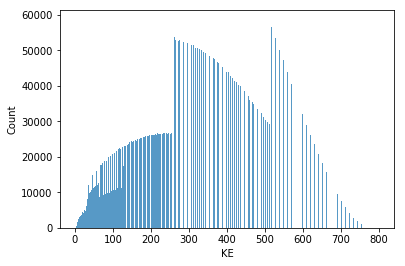

In [9]:
sns.histplot(eCheck['KE'], binrange=(0,800), bins = 8000)

/home/rhythm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


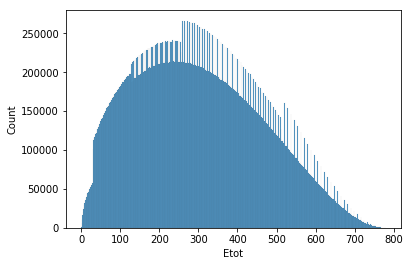

In [10]:
eCheck['Etot'] = eCheck['E1'] + eCheck['E2']
sns.histplot(eCheck['Etot'])

In [ ]:
sns.histplot(data = ucnaPType0, x = 'KE', binrange=(0,800). binwidth=)

In [6]:
ucnaType0 = pd.read_csv('./feb/nDecayUCNA_withGas_100MillType0.txt',sep = " ", header = None, dtype = dtype,names = col)


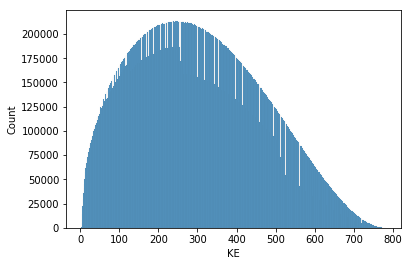

In [7]:
sns.histplot(ucnaPType0['KE'], bins = 800)

In [11]:
ucnaPType0['Etot'] = ucnaPType0['E1'] + ucnaPType0['E2'] 

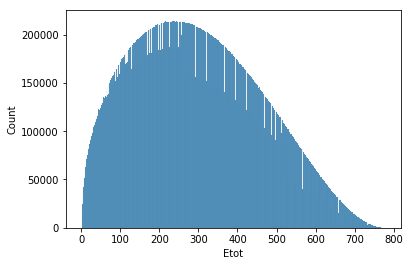

In [13]:
sns.histplot(ucnaPType0['Etot'], bins = 800)

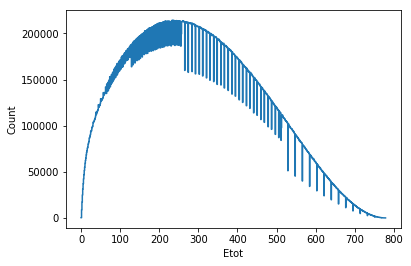

In [14]:
sns.histplot(ucnaPType0['Etot'], bins = 800, element='step', fill=False)

In [6]:
ucnaType0['Etot'] = ucnaType0['E1'] + ucnaType0['E2'] 

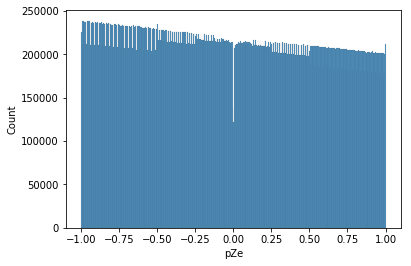

In [15]:
sns.histplot(ucnaPType0['pZe'])

In [ ]:
sns.distplot(ucnaPType0['Etot'], bins = 8000 )

In [7]:
E = 30 
ucnaType0 = ucnaType0[ucnaType0['E1'] > E]

ucnaPType0 = ucnaPType0[ucnaPType0['E1'] > E]

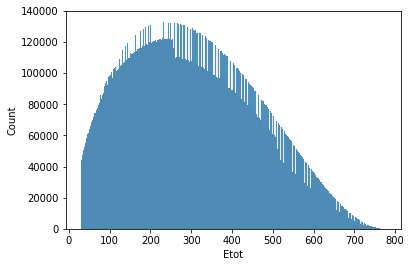

In [9]:
sns.histplot(ucnaType0['Etot'])

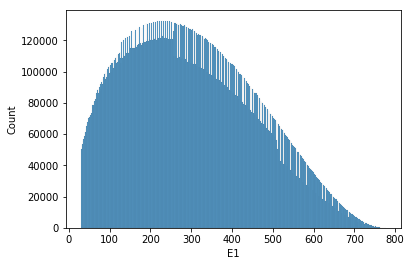

In [11]:
sns.histplot(ucnaType0['E1'])

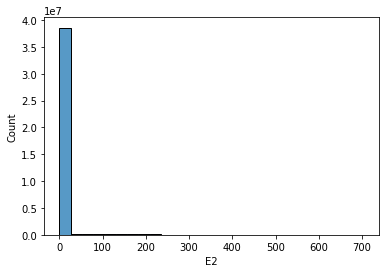

In [12]:
sns.histplot(ucnaType0['E2'])

In [58]:
x = ucnaPType0[ucnaPType0['E1'] < 30 ]

x

In [51]:
E = 30
ucnaPAboveThr['E1'] = ucnaPType0[ucnaPType0['E1'] > E]
#ucnaPAboveThr['TotE'] = ucnaPAboveThr['E1'] + ucnaPAboveThr['E2']
#sns.histplot(ucnaPAboveThr['TotE'])

In [ ]:
ucnaPAboveThr['TotE'] = ucnaPAboveThr['E1'] + ucnaPAboveThr['E2']

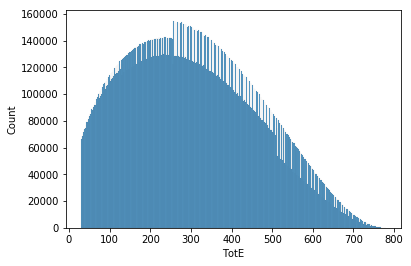

In [54]:
sns.histplot(ucnaPAboveThr['TotE'])

In [2]:
ucna_plus = "/home/rhythm/Research/ml/research/2024/feb/nDecay_100Mill_foilBothSide.root" #UCNA+
ucna = "/home/rhythm/Research/ml/research/2024/feb/nDecayUCNA_100Mill_foilBothSide.root" #UCNA
#

In [3]:
ucna_plus = uproot.open(ucna_plus)
ucna = uproot.open(ucna)


In [ ]:
histogram_data = ucna["EdepType0"]
bin_edges = histogram_data.axis().edges()
bin_contents = histogram_data.values()

#for edge, content in zip(bin_edges, bin_contents):
#    print(f"Bin Edge: {edge}, Bin Content: {content}")
selected_bins = bin_edges > 1.0
filtered_bin_contents = bin_contents[selected_bins[:-1]]  # Exclude the last bin

# Calculate the total count for selected bins
total_count_selected_bins = sum(filtered_bin_contents)
print("Total Count for bins with edge > 1.0:", total_count_selected_bins)



In [4]:
ucna_E01 = ucna["EdepType01"]
e01 = ucna_E01.axis().edges()
n01 = ucna_E01.values()
ucna_E02 = ucna["EdepType02"]
e02 = ucna_E02.axis().edges()[:-1]
n02 = ucna_E02.values()


In [12]:
ucna_E01P = ucna_plus["EdepType01"]
e01_P = ucna_E01P.axis().edges()
n01_P = ucna_E01P.values()
ucna_E02P = ucna_plus["EdepType02"]
e02_P = ucna_E02P.axis().edges()[:-1]
n02_P = ucna_E02P.values()


In [13]:
data = {'Energy': e02, 'N01': n01, 'N02': n02}
dataP = {'Energy': e02_P, 'N01': n01_P, 'N02': n02_P}
# Create a DataFrame
ucna_df = pd.DataFrame(data)
ucnaP_df = pd.DataFrame(dataP)
# Display the DataFrame
#print(ucna_df)


In [101]:
ucna_df

,Energy,N01,N02
0,0.0,168.0,179.0
1,0.1,247.0,260.0
2,0.2,194.0,195.0
3,0.3,143.0,137.0
4,0.4,101.0,121.0
...,...,...,...
7995,799.5,0.0,0.0
7996,799.6,0.0,0.0
7997,799.7,0.0,0.0
7998,799.8,0.0,0.0


In [ ]:

for E in np.arange(10,35,5):
   # ucna_df.loc[ucna_df['Energy'] < E, 'N01'] = 0
    ucna_df['Ntot'] = ucna_df['N01'] + ucna_df['N02']
    x = ucna_df[ucna_df['Energy'] > E]

    #ucnaP_df.loc[ucnaP_df['Energy'] < E, 'N01'] = 0
    ucnaP_df['Ntot'] = ucnaP_df['N01'] + ucnaP_df['N02']
    p = ucnaP_df[ucnaP_df['Energy'] > E]

    plt.figure(figsize=(12, 10))

    plt.step(x = x['Energy'], y = x['Ntot']/Nucna , c = 'blue', label = 'UCNA')
    plt.step(x = p['Energy'], y = p['Ntot']/NucnaP,c = 'red', label = 'UCNA+' )
    plt.xlabel("Energy (keV)", fontsize = 16)
    plt.ylabel("Normalised Count", fontsize = 16)
    plt.title(f"EdepType0 Histogram E_Thr > {E} (keV)", fontsize = 16)
    plt.ylim(0.0, 0.00025)
    plt.xlim(0,820)
    plt.yticks(np.arange(0,0.00025,0.00001), fontsize = 16)
    plt.xticks(np.arange(0,820,50), fontsize = 16)
    plt.grid(linestyle = '--')
    # Add a legend if needed
    plt.legend()
    plt.savefig(f'./feb/cutsOnBothDetectorspectraType0{E}'+'.jpg')

In [17]:
def asymmetry(df):
    df['A_meas'] = (df['N01'] - df['N02']) /(df['N01']+df['N02']) 
    return df

In [ ]:

for E in np.arange(10,35,5):
    ucna_a = asymmetry(ucna_df)
    x = ucna_a[ucna_a['Energy'] > E]

    ucnaP_a = asymmetry(ucnaP_df)
    p = ucnaP_a[ucnaP_a['Energy'] > E]

    plt.figure(figsize=(12, 10))

    plt.scatter(x = x['Energy'], y = x['A_meas'], c = 'blue',alpha = 0.2, label = 'UCNA')
    plt.scatter(x = p['Energy'], y = p['A_meas'], c = 'red' ,alpha = 0.2, label = 'UCNA+' )
    plt.xlabel("Energy (keV)", fontsize = 16)
    plt.ylabel("Normalised Count", fontsize = 16)
    plt.ylim(-0.5, 0.5)
    plt.xlim(0,820)
    plt.yticks(np.arange(-0.5,0.5,0.05), fontsize = 16)
    plt.xticks(np.arange(0,820,50), fontsize = 16)
    plt.grid(linestyle = '--')
    # Add a legend if needed
    plt.legend()
    plt.title(f"A_meas type 0 E_Thr > {E} (keV)", fontsize = 16)
    plt.savefig(f'./feb/A_measType0{E}'+'.jpg')

In [24]:
def asymmetryTot(df):
    N1  = df['N01'].sum()
    N2  = df['N02'].sum()
    a_meas = (N1-N2)/(N1+N2)
   # errAmeas = 
    return a_meas

In [25]:
ucna_aMeasTot  = []
ucnaP_aMeasTot = []

for E in np.arange(10,120,5):
    x = ucna_df[ucna_df['Energy'] > E]

    p = ucnaP_a[ucnaP_a['Energy'] > E]
    a_measX = asymmetryTot(x)
    a_measP = asymmetryTot(p)
    ucna_aMeasTot.append(a_measX)
    ucnaP_aMeasTot.append(a_measP)
#plt.figure(figsize=(12, 10))
#
#plt.scatter(x = , y = x['A_meas'], c = 'blue',alpha = 0.2, label = 'UCNA')
#plt.scatter(x = p['Energy'], y = p['A_meas'], c = 'red' ,alpha = 0.2, label = 'UCNA+' )
#plt.xlabel("Energy (keV)", fontsize = 16)
#plt.ylabel("Normalised Count", fontsize = 16)
#plt.ylim(-0.5, 0.5)
#plt.xlim(0,820)
#plt.yticks(np.arange(-0.5,0.5,0.05), fontsize = 16)
#plt.xticks(np.arange(0,820,50), fontsize = 16)
#plt.grid(linestyle = '--')
## Add a legend if needed
#plt.legend()
#plt.title(f"A_meas type 0 E_Thr > {E} (keV)", fontsize = 16)


In [27]:
energy = np.arange(10,120,5)

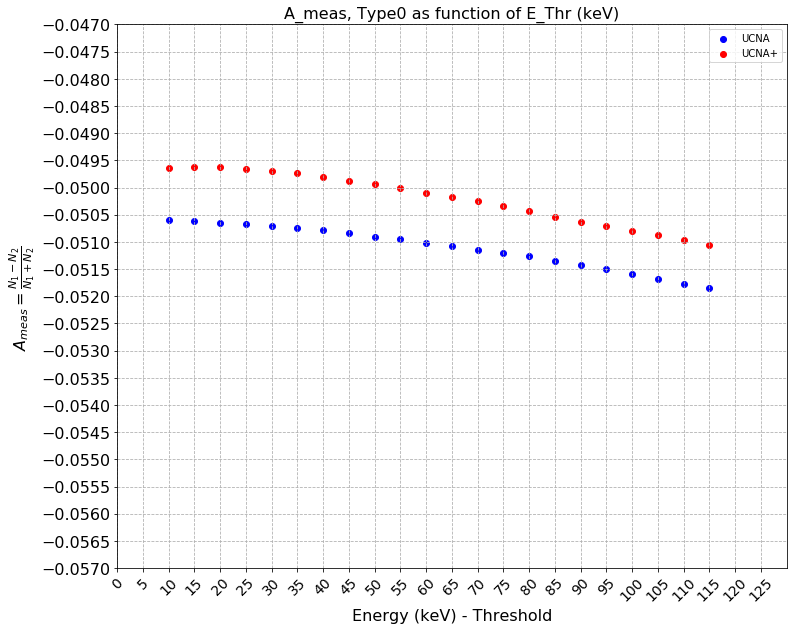

In [45]:
plt.figure(figsize=(12, 10))
plt.xlabel("Energy (keV) - Threshold", fontsize = 16)
plt.ylabel(r"$A_{meas} = \frac{N_1-N_2}{N_1+N_2}$ ", fontsize = 16)
plt.ylim(-0.057, -0.047)
plt.xlim(0,130)
plt.yticks(np.arange(-0.057,-0.047,0.0005), fontsize = 16)
plt.xticks(np.arange(0,130,5), fontsize = 14, rotation = 45 )
plt.grid(linestyle = '--')


plt.scatter(x = energy, y = ucna_aMeasTot, c = 'blue', label = 'UCNA')
plt.scatter(x = energy, y = ucnaP_aMeasTot, c = 'red', label = 'UCNA+')
plt.legend()
plt.title(f"A_meas, Type0 as function of E_Thr (keV)", fontsize = 16)
plt.savefig(f'./feb/graphs/A_measType0functionofE_Thr.jpg')

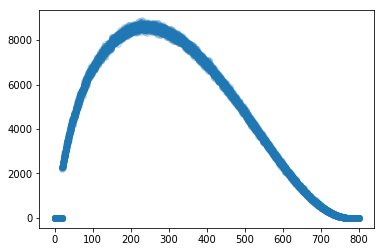

In [32]:
plt.scatter(x = ucna_df['Energy'], y = ucna_df['N01'], alpha = 0.2, )

In [48]:
columnUCNAp  = ['nHit','KE', 'E1', 'E2', 't1', 't2', 'pin', 'pOut', 'pZe']
columnUCNA  = ['nHit','KE', 'E1', 'E2', 't1', 't2', 'pin', 'pOut', 'pZe', 'eMWPC1','eMWPC2']
dtype = np.float32

In [49]:
eUCNA_type1 = pd.read_csv('./feb/nDecayUCNA_withGas_100MillType1.txt' ,sep =" ",header = None, dtype = dtype,names = columnUCNA).drop(['pin', 'pOut','eMWPC1','eMWPC2'], axis = 1)
eUCNAP_type1 = pd.read_csv('./feb/nDecay_100Mill_foilBothSide.txt',sep =" ", header = None, dtype = dtype,names = columnUCNAp)

In [84]:
eUCNA_type1['Etot'] = eUCNA_type1['E1'] + eUCNA_type1['E2']
eUCNAP_type1['Etot'] = eUCNAP_type1['E1'] + eUCNAP_type1['E2']

In [124]:
#totalCountRate
r1_ucna  = []
r2_ucna  = [] 
r1_ucnaP = []
r2_ucnaP = []
err_r1_ucna  = []
err_r2_ucna  = [] 
err_r1_ucnaP = []
err_r2_ucnaP = []
r_ucna  = [] 
r_ucnaP = []

for E in np.arange(10,110,10):
    ucnaThr = ucna_df[ucna_df['Energy'] > E]
    r01 = ucnaThr['N01'].sum()
    r02 = ucnaThr['N02'].sum()
    print(f'UCNA : r01 : {r01}, r02 : {r02}')
    ucnaPThr = ucnaP_df[ucnaP_df['Energy'] > E]
    r01_P = ucnaPThr['N01'].sum()
    r02_P = ucnaPThr['N02'].sum()
    print(f'UCNA+: r01 : {r01_P}, r02 : {r02_P}')
    r11 = eUCNA_type1[(eUCNA_type1['t1'] < eUCNA_type1['t2'])&( eUCNA_type1['E1'] > E)].shape[0]

    r21 = eUCNA_type1[(eUCNA_type1['t2'] < eUCNA_type1['t1'])&( eUCNA_type1['E1'] > E)].shape[0]
    print(f'UCNA : r11 : {r11}, r21 : {r21}')
    r11_P = eUCNAP_type1[(eUCNAP_type1['t1'] < eUCNAP_type1['t2'])&( eUCNAP_type1['E1'] > E)].shape[0]
    
    r21_P = eUCNAP_type1[(eUCNAP_type1['t2'] < eUCNAP_type1['t1'])&( eUCNAP_type1['E1'] > E)].shape[0]
    print(f'UCNA+: r11 : {r11_P}, r21 : {r21_P}')
    ratio1_ucna  = r11/r01 
    ratio2_ucna  = r21/r02 
    ratio1_ucnaP = r11_P/r01_P
    ratio2_ucnaP = r21_P/r02_P
    rUCNA = (r11+r21)/(r01+r01)
    rUCNAP = (r11_P+r21_P)/(r01_P+r02_P)
    err1_ucna = ratio1_ucna*((1/np.sqrt(r11))+(1/np.sqrt(r01)))
    err2_ucna = ratio2_ucna*((1/np.sqrt(r21))+(1/np.sqrt(r02)))
    err1_ucnaP = ratio1_ucnaP*((1/np.sqrt(r11_P))+(1/np.sqrt(r01_P)))
    err2_ucnaP = ratio2_ucnaP*((1/np.sqrt(r21_P))+(1/np.sqrt(r02_P)))
    r1_ucna.append(ratio1_ucna)  
    r2_ucna.append(ratio2_ucna)  
    r1_ucnaP.append(ratio1_ucnaP) 
    r2_ucnaP.append(ratio2_ucnaP) 
    err_r1_ucna.append(err1_ucna)
    err_r2_ucna.append(err2_ucna) 
    err_r1_ucnaP.append(err1_ucnaP)
    err_r2_ucnaP.append(err2_ucnaP)
    r_ucna.append(rUCNA)  
    r_ucnaP.append(rUCNAP)

UCNA : r01 : 38957906.0, r02 : 43110351.0
UCNA+: r01 : 46318078.0, r02 : 51157188.0
UCNA : r11 : 439418, r21 : 473796
UCNA+: r11 : 667966, r21 : 718689
UCNA : r01 : 38782493.0, r02 : 42921133.0
UCNA+: r01 : 45968835.0, r02 : 50769943.0
UCNA : r11 : 428032, r21 : 461584
UCNA+: r11 : 645099, r21 : 676468
UCNA : r01 : 38514014.0, r02 : 42629038.0
UCNA+: r01 : 45518470.0, r02 : 50279196.0
UCNA : r11 : 415745, r21 : 442872
UCNA+: r11 : 623235, r21 : 627546
UCNA : r01 : 38162875.0, r02 : 42246739.0
UCNA+: r01 : 44994763.0, r02 : 49711062.0
UCNA : r11 : 402926, r21 : 419024
UCNA+: r11 : 601456, r21 : 577631
UCNA : r01 : 37740843.0, r02 : 41789512.0
UCNA+: r01 : 44411667.0, r02 : 49080010.0
UCNA : r11 : 389627, r21 : 391965
UCNA+: r11 : 579528, r21 : 529395
UCNA : r01 : 37263491.0, r02 : 41269973.0
UCNA+: r01 : 43777550.0, r02 : 48395048.0
UCNA : r11 : 375934, r21 : 363633
UCNA+: r11 : 557708, r21 : 483405
UCNA : r01 : 36729324.0, r02 : 40689437.0
UCNA+: r01 : 43098325.0, r02 : 47659251.0
UCNA

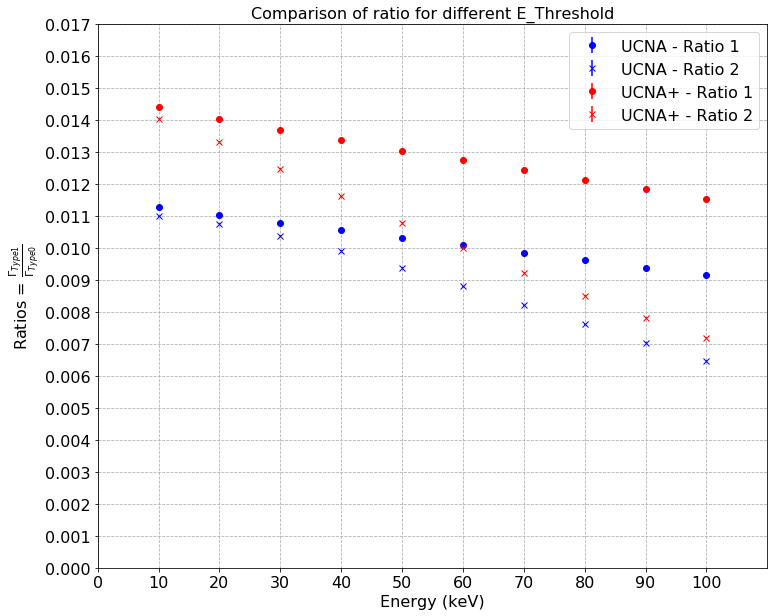

In [120]:
energyThr = np.array(np.arange(10,110,10))
plt.figure(figsize=(12, 10))

plt.errorbar(x=energyThr, y=r1_ucna, yerr=err_r1_ucna, fmt = 'o',c='blue', label='UCNA - Ratio 1')
plt.errorbar(x=energyThr, y=r2_ucna, yerr=err_r2_ucna, fmt = 'x',c='blue', label='UCNA - Ratio 2')
plt.errorbar(x=energyThr, y=r1_ucnaP, yerr=err_r1_ucnaP,fmt = 'o',c='red', label='UCNA+ - Ratio 1')
plt.errorbar(x=energyThr, y=r2_ucnaP, yerr=err_r2_ucnaP,fmt = 'x',c='red', label='UCNA+ - Ratio 2')

# Add labels and legend
plt.xlabel('Energy')
plt.ylabel('Ratio')
plt.title('Ratios with Error Bars')
plt.legend()
plt.xlabel("Energy (keV)", fontsize = 16)
plt.ylabel(r"Ratios = $\frac{\Gamma_{Type1}}{\Gamma_{Type0}}$", fontsize = 16)
plt.title(f"Comparison of ratio for different E_Threshold", fontsize = 16)
plt.ylim(0.0, 0.017)
plt.xlim(0,110)
plt.yticks(np.arange(0,0.018,0.001), fontsize = 16)
plt.xticks(np.arange(0,110,10), fontsize = 16)
plt.grid(linestyle = '--')
## Add a legend if needed
plt.legend(fontsize = 16)
#plt.savefig(f'ratioVSthr.jpg')

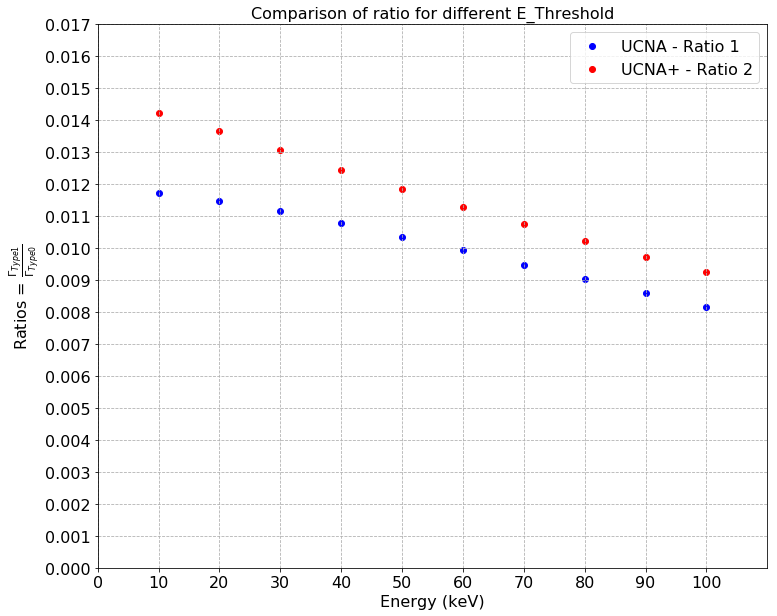

In [127]:
energyThr = np.array(np.arange(10,110,10))
plt.figure(figsize=(12, 10))

plt.scatter(x=energyThr, y=r_ucna,  c='blue', label='UCNA - Ratio 1')
plt.scatter(x=energyThr, y=r_ucnaP, c='red', label='UCNA+ - Ratio 2')
#plt.errorbar(x=energyThr, y=r1_ucnaP, yerr=err_r1_ucnaP,fmt = 'o',c='red', label='UCNA+ - Ratio 1')
#plt.errorbar(x=energyThr, y=r2_ucnaP, yerr=err_r2_ucnaP,fmt = 'x',c='red', label='UCNA+ - Ratio 2')

# Add labels and legend
plt.xlabel('Energy')
plt.ylabel('Ratio')
plt.title('Ratios with Error Bars')
plt.legend()
plt.xlabel("Energy (keV)", fontsize = 16)
plt.ylabel(r"Ratios = $\frac{\Gamma_{Type1}}{\Gamma_{Type0}}$", fontsize = 16)
plt.title(f"Comparison of ratio for different E_Threshold", fontsize = 16)
plt.ylim(0.0, 0.017)
plt.xlim(0,110)
plt.yticks(np.arange(0,0.018,0.001), fontsize = 16)
plt.xticks(np.arange(0,110,10), fontsize = 16)
plt.grid(linestyle = '--')
## Add a legend if needed
plt.legend(fontsize = 16)
plt.savefig(f'ratiototVSthr.jpg')

In [50]:
eUCNAP_type1

,nHit,KE,E1,E2,t1,t2,pin,pOut,pZe
0,2.0,424.251007,362.860992,59.881199,1.456130e-08,4.835160e-08,0.0,0.577150,0.573171
1,2.0,282.165985,124.403999,155.779999,9.827440e-08,1.848830e-08,0.0,0.329755,-0.489638
2,2.0,208.298004,120.836998,83.164001,4.533660e-08,1.069670e-08,0.0,0.705897,-0.970811
3,2.0,443.467987,271.417999,170.039001,2.774620e-08,6.040730e-08,0.0,0.270574,0.275075
4,2.0,259.972992,145.227005,101.418999,1.755500e-08,4.923970e-08,0.0,0.541113,0.527775
...,...,...,...,...,...,...,...,...,...
1730592,2.0,93.000099,49.308701,38.586201,3.147920e-07,3.582580e-07,0.0,0.172630,0.030998
1730593,2.0,81.873299,33.216099,44.949902,6.494240e-08,1.511610e-07,0.0,0.268308,0.177733
1730594,2.0,282.230011,108.293999,165.052002,6.272650e-08,2.003090e-08,0.0,0.579716,-0.453898
1730595,2.0,291.089996,38.159000,245.253998,1.946830e-06,1.892680e-06,0.0,0.770321,0.003613


In [59]:

for E in np.arange(10,35,5):
    ucnaType1EThr = eUCNA_type1[(eUCNA_type1['E1'] > E) | (eUCNA_type1['E2'] > E )] 
    ucnaPType1EThr = eUCNAP_type1[(eUCNAP_type1['E1'] > E) | (eUCNAP_type1['E2'] > E )] 
    
#    eUCNAP_type1.loc[eUCNAP_type1['E1'] < E, 'E1'] = 0
    
    ucnaType1EThr['Etot'] = ucnaType1EThr['E1'] + ucnaType1EThr['E2']
    ucnaPType1EThr['Etot'] = ucnaPType1EThr['E1'] + ucnaPType1EThr['E2']
    plt.figure(figsize=(12, 10))
    print(f'N_Type 1 UCNA : ', ucnaType1EThr.shape[0]/Nucna)
    print(f'N_Type 1 UCNA+ : ', ucnaPType1EThr.shape[0]/NucnaP)
   
   # sns.histplot(data = ucnaType1EThr, x = 'Etot', stat='density',element='step', fill=False, color='blue', label = 'UCNA')
   # sns.histplot(data = ucnaPType1EThr, x = 'Etot', element='step', stat='density', fill=False, color='red', label = 'UCNA+')
   # plt.xlabel("Energy (keV)", fontsize = 16)
   # plt.ylabel("Normalised Count", fontsize = 16)
   # plt.title(f"Type 1 Histogram E_Thr > {E} (keV)", fontsize = 16)
   # plt.ylim(0.0, 0.0025)
   # plt.xlim(0,820)
   # plt.yticks(np.arange(0,0.0025,0.0001), fontsize = 16)
   # plt.xticks(np.arange(0,820,50), fontsize = 16)
   # plt.grid(linestyle = '--')
   # # Add a legend if needed
   # plt.legend()
   # plt.savefig(f'./feb/spectraType1BTS{E}'+'.jpg')

/home/rhythm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/rhythm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


N_Type 1 UCNA :  0.013263770937723693
N_Type 1 UCNA+ :  0.01726975


N_Type 1 UCNA :  0.01325411596277738
N_Type 1 UCNA+ :  0.01720527
N_Type 1 UCNA :  0.013235974230493915
N_Type 1 UCNA+ :  0.01711108
N_Type 1 UCNA :  0.013207078024337867
N_Type 1 UCNA+ :  0.01699392
N_Type 1 UCNA :  0.013163957050823193
N_Type 1 UCNA+ :  0.01685504


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

In [ ]:
print("Bin Contents for bins with edge > 1.0:")
for edge, content in zip(bin_edges[:-1], bin_contents):
    if edge > 1.0:
        print(f"Bin Edge: {edge}, Bin Content: {content}")


In [10]:
eType0_ucna  = ucna["EdepType0"]
eType0_ucnaP = ucna_plus["EdepType0"]
# Get bin edges and contents
bin_edges_ucna = eType0_ucna.axis().edges()
bin_contents_ucna = eType0_ucna.values()

bin_edges_ucnaP   = eType0_ucnaP.axis().edges()
bin_contents_ucnaP= eType0_ucnaP.values()
# total NCounts
Nucna= 8.73125e+07
NucnaP = 1e+08

In [5]:
eType01_ucna  = ucna["EdepType01"]
eType01_ucnaP = ucna_plus["EdepType01"]
# Get bin edges and contents
bin_edges_ucna_01 = eType01_ucna.axis().edges()
bin_contents_ucna_01 = eType01_ucna.values()

bin_edges_ucnaP_01   = eType01_ucnaP.axis().edges()
bin_contents_ucnaP_01= eType01_ucnaP.values()

In [7]:
bin_contents_ucna_01

array([168., 247., 194., ...,   0.,   0.,   0.])

In [ ]:
plt.figure(figsize=(12, 10))

plt.step(bin_edges[:-1], normalized_contents, where='post', label="UCNA+")
#plt.step(bin_edges_ucna[:-1], normalized_contents_ucna, where='post', label="UCNA")

# Add labels and title
plt.xlabel("Energy (keV)", fontsize = 16)
plt.ylabel("Normalised Count", fontsize = 16)
plt.title("EdepType0 Histogram")
#plt.ylim(0.0, 0.00125)
plt.xlim(0,820)
#plt.yticks(np.arange(0,0.00025,0.00005), fontsize = 16)
plt.xticks(np.arange(0,820,50), fontsize = 16)
plt.grid(linestyle = '--')
# Add a legend if needed
plt.legend()

In [44]:
#bin cut on detector 1 
energyCut_ucna = bin_edges_ucna_01 > 10.0
bin_contents_ucna = bin_contents_ucna_01[energyCut_ucna[:-1]]  # Exclude the last bin
# Interpolate filtered_bin_contents to match bin_edges1
interpolated_filtered_bin_contents = np.interp(bin_edges_ucna_01[:-1], bin_edges_ucna[:-1][energyCut_ucna[:-1]], filtered_bin_contents)

#Type0Rate 
tot_rate = (bin_contents_ucna-interpolated_filtered_bin_contents)/Nucna

# Plot the histogram lines for selected bins
plt.step(bin_edges[:-1][selected_bins[:-1]], tot_rate, where='post', color='b', linestyle='-')
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")
plt.title("Histogram Lines for Bins with Edge > 1.0")
plt.show()

ValueError: fp and xp are not of the same length.

In [ ]:
# Filter bins where bin edge is greater than 1.0
selected_bins = bin_edges > 1.0
filtered_bin_contents = bin_contents[selected_bins[:-1]]  # Exclude the last bin

# Plot the histogram lines for selected bins
plt.step(bin_edges[:-1][selected_bins[:-1]], filtered_bin_contents, where='post', color='b', linestyle='-')
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")
plt.title("Histogram Lines for Bins with Edge > 1.0")
plt.show()

83390685.0
[347. 507. 389. ...   0.   0.   0.]
[1032. 1094. 1174. ...    0.    0.    0.]
83390685.0


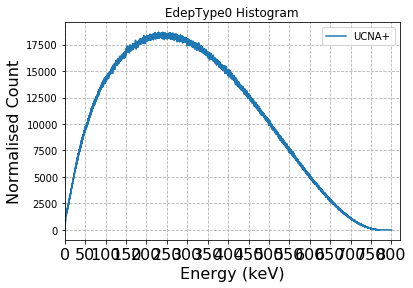

In [ ]:
histogram_data = ucna["EdepType0"]
bin_edges = histogram_data.axis().edges()
bin_contents = histogram_data.values()
total_Count = sum(bin_contents)
print(total_Count)
# Filter bins where bin edge is greater than 30
selected_bins = bin_edges > 2
print(bin_contents)
filtered_bin_contents = bin_contents[selected_bins[:-1]]
print(filtered_bin_contents)
# Calculate the total count for selected bins
total_count = sum(filtered_bin_contents)

print(total_Count)
normalized_contents = bin_contents
#plt.figure(figsize=(12, 10))

plt.step(bin_edges[:-1], normalized_contents, where='post', label="UCNA+")
plt.step(bin_edges_ucna[:-1], normalized_contents_ucna, where='post', label="UCNA")
#
## Add labels and title
plt.xlabel("Energy (keV)", fontsize = 16)
plt.ylabel("Normalised Count", fontsize = 16)
plt.title("EdepType0 Histogram")
#plt.ylim(0.0, 0.00125)
plt.xlim(0,820)
#plt.yticks(np.arange(0,0.00025,0.00005), fontsize = 16)
plt.xticks(np.arange(0,820,50), fontsize = 16)
plt.grid(linestyle = '--')
# Add a legend if needed
plt.legend()



In [3]:
ucnaType0 = pd.read_csv('./feb/nDecay_100Mill_Type0.txt',sep = " ", header = None, dtype = dtype,names = col)


In [ ]:
ucnaOldType0 = pd.read_csv('./feb/nDecay_100Mill_Type0.txt',sep = " ", header = None, dtype = dtype,names = col)


In [ ]:
ucna01_opp = pd.read_csv('./jan/nDecayUCNA_100Mill_01_oppDirection.txt',sep = " ", header = None, dtype = dtype,names = col)


In [ ]:
pip install uproot

In [5]:
import uproot

In [14]:
tot_evt_ucna = 9.986099e+07
tot_evt_ucna_plus = 1.99875e+07  


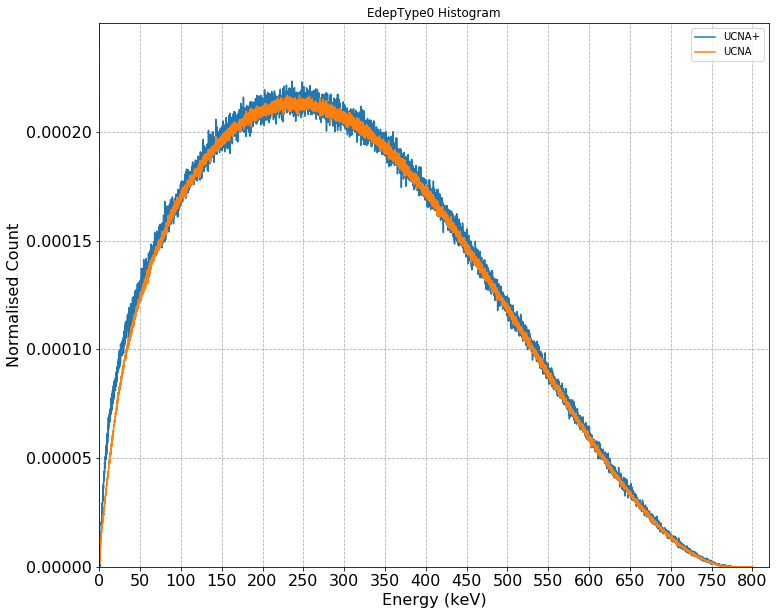

In [29]:
import uproot
import matplotlib.pyplot as plt

# Specify the path to your ROOT file
root_file_path = "/home/rhythm/Research/ml/research/2114/jan/nDecay_100Mill_foilBothSide.root" #UCNA+
root_file_path_ucna = "/home/rhythm/Research/ml/research/2124/jan/nDecayUCNA_100Mill_foilBothSide.root" #UCNA
# Open the ROOT file
file = uproot.open(root_file_path)
file_ucna = uproot.open(root_file_path_ucna)
# Access the histogram data (assuming it's a TH1D named "EdepType0")
tot_evt_ucna = 9.986099e+07
tot_evt_ucna_plus = 1.99875e+07  

histogram_data = file["EdepType0"]
histogram_data_ucna = file_ucna["EdepType0"]
# Extract bin edges and contents from the histogram data
bin_edges = histogram_data.axis().edges()
bin_contents = histogram_data.values()
normalized_contents = bin_contents/tot_evt_ucna_plus 

bin_edges_ucna = histogram_data_ucna.axis().edges()
bin_contents_ucna = histogram_data_ucna.values()
normalized_contents_ucna = bin_contents_ucna/tot_evt_ucna 

# Plot the histogram using Matplotlib
plt.figure(figsize=(12, 10))

plt.step(bin_edges[:-1], normalized_contents, where='post', label="UCNA+")
plt.step(bin_edges_ucna[:-1], normalized_contents_ucna, where='post', label="UCNA")

# Add labels and title
plt.xlabel("Energy (keV)", fontsize = 16)
plt.ylabel("Normalised Count", fontsize = 16)
plt.title("EdepType0 Histogram")
plt.ylim(0.0, 0.00125)
plt.xlim(0,820)
plt.yticks(np.arange(0,0.00025,0.00005), fontsize = 16)
plt.xticks(np.arange(0,820,50), fontsize = 16)
plt.grid(linestyle = '--')
# Add a legend if needed
plt.legend()

# Show the plot
plt.show()
def custom_function(theta, A, beta):
    return 1 + A * beta * np.cos(theta)

## Access the bin contents
#print("Bin Contents:", bin_contents)


In [33]:
# Access the histogram data (assuming it's a TH1D named "EdepType0")
tot_evt_ucna_01 = 4.588248e+07
tot_evt_ucna_plus_01 = 9286418  


In [35]:
tot_evt_ucna_01/tot_evt_ucna

0.4594635002116442

In [36]:
tot_evt_ucna_plus_01/tot_evt_ucna_plus

0.46461128205128205

In [37]:
(0.4594635002116442 - 0.46461128205128205) / 0.46461128205128205

-0.0110797607344146

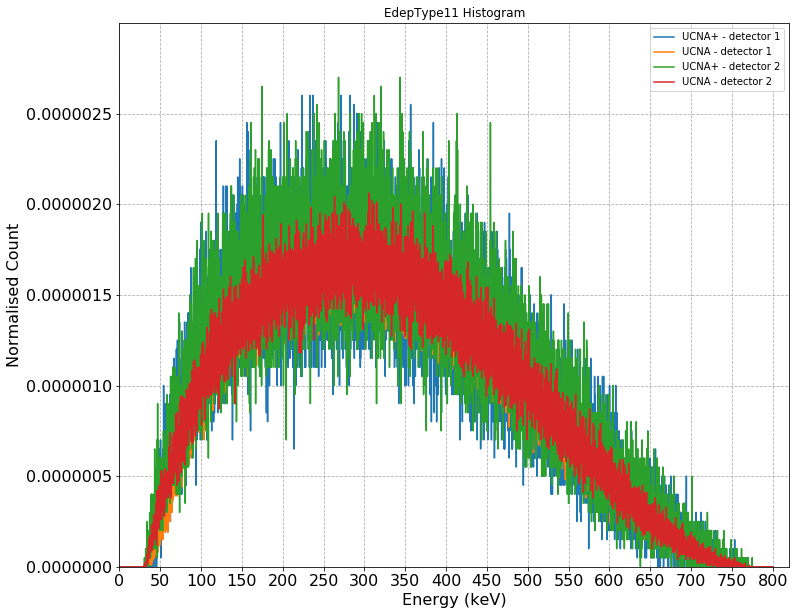

In [41]:
# Access the histogram data (assuming it's a TH1D named "EdepType0")
tot_evt_ucna_11 = 4.588248e+07
tot_evt_ucna_plus_11 = 9286418  

histogram_data_11 = file["EdepType11"]
histogram_data_ucna_11 = file_ucna["EdepType11"]
# Extract bin edges and contents from the histogram data
bin_edges_11 = histogram_data_11.axis().edges()
bin_contents_11 = histogram_data_11.values()
normalized_contents_11 = bin_contents_11/tot_evt_ucna_plus 

bin_edges_ucna_11 = histogram_data_ucna_11.axis().edges()
bin_contents_ucna_11 = histogram_data_ucna_11.values()
normalized_contents_ucna_11 = bin_contents_ucna_11/tot_evt_ucna

histogram_data_12 = file["EdepType12"]
histogram_data_ucna_12 = file_ucna["EdepType12"]
# Extract bin edges and contents from the histogram data
bin_edges_12 = histogram_data_12.axis().edges()
bin_contents_12 = histogram_data_12.values()
normalized_contents_12 = bin_contents_12/tot_evt_ucna_plus 

bin_edges_ucna_12 = histogram_data_ucna_12.axis().edges()
bin_contents_ucna_12 = histogram_data_ucna_12.values()
normalized_contents_ucna_12 = bin_contents_ucna_12/tot_evt_ucna


# Plot the histogram using Matplotlib
plt.figure(figsize=(12, 10))

plt.step(bin_edges[:-1], normalized_contents_11, where='post', label="UCNA+ - detector 1")
plt.step(bin_edges_ucna[:-1], normalized_contents_ucna_11, where='post', label="UCNA - detector 1")

plt.step(bin_edges[:-1], normalized_contents_12, where='post', label="UCNA+ - detector 2")
plt.step(bin_edges_ucna[:-1], normalized_contents_ucna_12, where='post', label="UCNA - detector 2")

# Add labels and title
plt.xlabel("Energy (keV)", fontsize = 16)
plt.ylabel("Normalised Count", fontsize = 16)
plt.title("EdepType11 Histogram")
plt.ylim(0.0, 0.0000030)
plt.xlim(0,820)
plt.yticks(np.arange(0,0.0000030,0.0000005), fontsize = 16)
plt.xticks(np.arange(0,820,50), fontsize = 16)
plt.grid(linestyle = '--')
# Add a legend if needed
plt.legend()

# Show the plot
plt.show()


## Access the bin contents
#print("Bin Contents:", bin_contents)


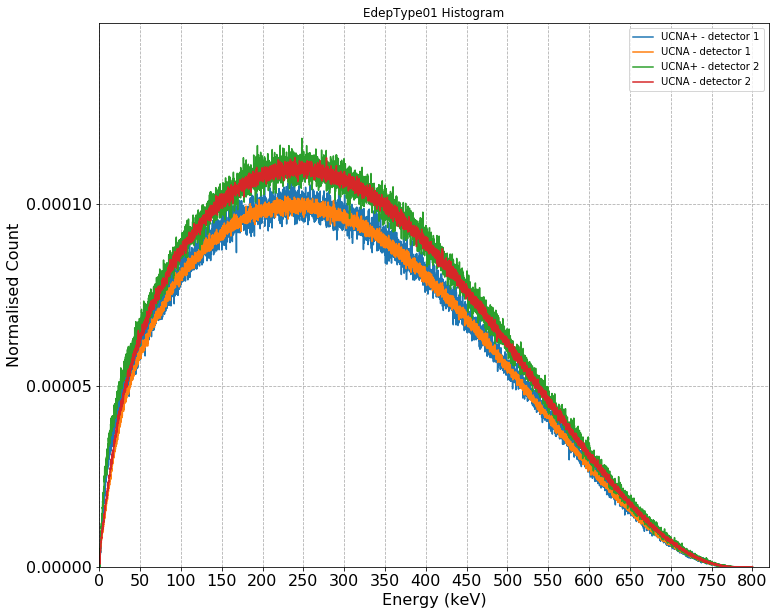

In [37]:
# Access the histogram data (assuming it's a TH1D named "EdepType0")
tot_evt_ucna_01 = 4.588248e+07
tot_evt_ucna_plus_01 = 9286418  

histogram_data_01 = file["EdepType01"]
histogram_data_ucna_01 = file_ucna["EdepType01"]
# Extract bin edges and contents from the histogram data
bin_edges_01 = histogram_data_01.axis().edges()
bin_contents_01 = histogram_data_01.values()
normalized_contents_01 = bin_contents_01/tot_evt_ucna_plus 

bin_edges_ucna_01 = histogram_data_ucna_01.axis().edges()
bin_contents_ucna_01 = histogram_data_ucna_01.values()
normalized_contents_ucna_01 = bin_contents_ucna_01/tot_evt_ucna

histogram_data_02 = file["EdepType02"]
histogram_data_ucna_02 = file_ucna["EdepType02"]
# Extract bin edges and contents from the histogram data
bin_edges_02 = histogram_data_02.axis().edges()
bin_contents_02 = histogram_data_02.values()
normalized_contents_02 = bin_contents_02/tot_evt_ucna_plus 

bin_edges_ucna_02 = histogram_data_ucna_02.axis().edges()
bin_contents_ucna_02 = histogram_data_ucna_02.values()
normalized_contents_ucna_02 = bin_contents_ucna_02/tot_evt_ucna


# Plot the histogram using Matplotlib
plt.figure(figsize=(12, 10))

plt.step(bin_edges[:-1], normalized_contents_01, where='post', label="UCNA+ - detector 1")
plt.step(bin_edges_ucna[:-1], normalized_contents_ucna_01, where='post', label="UCNA - detector 1")

plt.step(bin_edges[:-1], normalized_contents_02, where='post', label="UCNA+ - detector 2")
plt.step(bin_edges_ucna[:-1], normalized_contents_ucna_02, where='post', label="UCNA - detector 2")

# Add labels and title
plt.xlabel("Energy (keV)", fontsize = 16)
plt.ylabel("Normalised Count", fontsize = 16)
plt.title("EdepType01 Histogram")
plt.ylim(0.0, 0.00015)
plt.xlim(0,820)
plt.yticks(np.arange(0,0.00015,0.00005), fontsize = 16)
plt.xticks(np.arange(0,820,50), fontsize = 16)
plt.grid(linestyle = '--')
# Add a legend if needed
plt.legend()

# Show the plot
plt.show()


## Access the bin contents
#print("Bin Contents:", bin_contents)


In [44]:
#calculating asymmetry
asymm_UCNA_plus = (bin_contents_01 - bin_contents_02)/(bin_contents_01 + bin_contents_02)
asymm_UCNA = (bin_contents_ucna_01 - bin_contents_ucna_02)/(bin_contents_ucna_01 + bin_contents_ucna_02)

/home/rhythm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/rhythm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


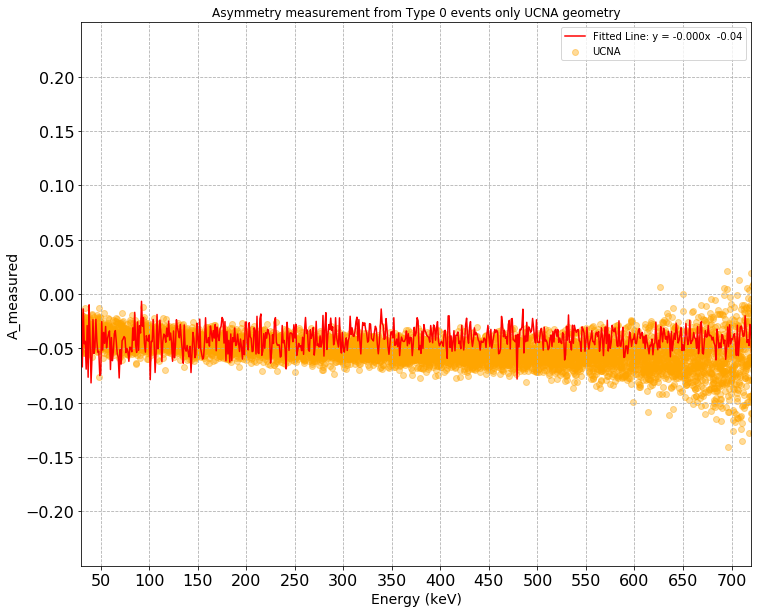

In [96]:
plt.figure(figsize=(12, 10))

plt.scatter(bin_edges_02[:-1],asymm_UCNA , label = 'UCNA', c = 'orange', alpha = 0.4)
#plt.scatter(bin_edges_02[:-1],asymm_UCNA_plus )
plt.yticks(np.arange(-0.2,0.25,0.05), fontsize = 16)
plt.xticks(np.arange(0,820,50), fontsize = 16)
plt.grid(linestyle = '--')
plt.ylabel('A_measured', fontsize = 14)
plt.xlabel('Energy (keV)', fontsize = 14)
plt.title('Asymmetry measurement from Type 0 events only UCNA geometry')
plt.xlim(30, 720)
plt.ylim(-0.25, 0.25)
# Perform linear regression (fit a straight line)
mask = ~np.isnan(asymm_UCNA)
new_bin_edges_02 = bin_edges_02[:-1][mask]
slope, intercept = np.polyfit(new_bin_edges_02, asymm_UCNA[mask], 1)
#slope, intercept = np.polyfit(bin_edges_02[:-1],asymm_UCNA, 1)

# Create the line equation
line_fit = slope * new_bin_edges_02 + asymm_UCNA[mask]
plt.plot(line_fit, color='red', label=f'Fitted Line: y = {slope:.3f}x  {intercept:.2f}')
plt.legend()

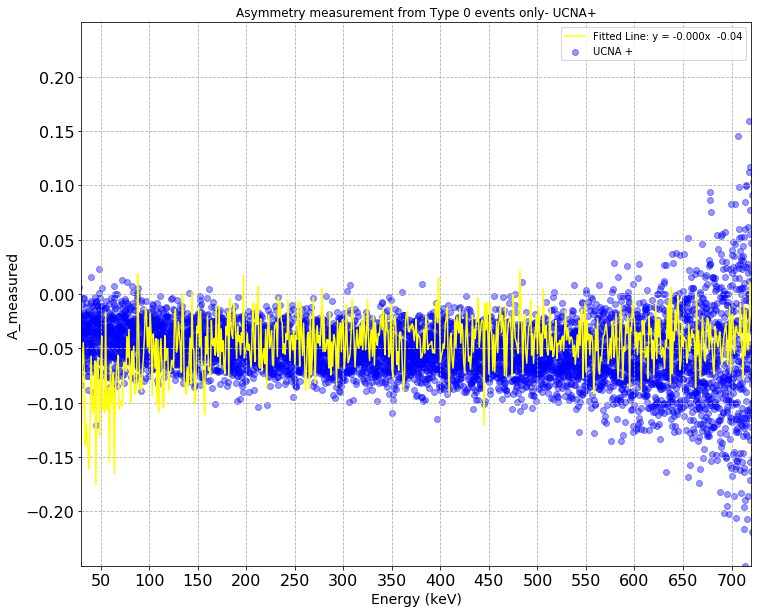

In [98]:
plt.figure(figsize=(12, 10))

#plt.scatter(bin_edges_02[:-1],asymm_UCNA , label = 'UCNA')
plt.scatter(bin_edges_02[:-1],asymm_UCNA_plus,label = 'UCNA + ' , c='blue', alpha = 0.4)
plt.yticks(np.arange(-0.2,0.25,0.05), fontsize = 16)
plt.xticks(np.arange(0,820,50), fontsize = 16)
plt.grid(linestyle = '--')
plt.ylabel('A_measured', fontsize = 14)
plt.xlabel('Energy (keV)', fontsize = 14)
plt.title('Asymmetry measurement from Type 0 events only- UCNA+')
plt.xlim(30, 720)
plt.ylim(-0.25, 0.25)
mask = ~np.isnan(asymm_UCNA_plus)
new_bin_edges_02 = bin_edges_02[:-1][mask]
slope, intercept = np.polyfit(new_bin_edges_02, asymm_UCNA_plus[mask], 1)
#slope, intercept = np.polyfit(bin_edges_02[:-1],asymm_UCNA, 1)

# Create the line equation
line_fit = slope * new_bin_edges_02 + asymm_UCNA_plus[mask]
plt.plot(line_fit, color='yellow', label=f'Fitted Line: y = {slope:.3f}x  {intercept:.2f}')
plt.legend()


In [3]:
col = ['TotalNoHits','KE', 'E1', 'E2','pZe']
dtype = np.float16


In [21]:
ucna01_opp = pd.read_csv('./jan/nDecayUCNA_100Mill_01_oppDirection.txt',sep = " ", header = None, dtype = dtype,names = col)
ucna02_opp = pd.read_csv('./jan/nDecayUCNA_100Mill_02_oppDirection.txt', sep = " ", header=None, names = col, dtype = dtype, )
ucna01_plus_opp   = pd.read_csv('./jan/nDecay+_100Mill_01_oppDirection.txt', sep = " ", header=None, names = col, dtype = dtype, )
ucna02_plus_opp = pd.read_csv('./jan/nDecay+_100Mill_02_oppDirection.txt', sep =" ", header=None, names = col, dtype = dtype,  )

In [1]:
ucna02_plus_opp/tot_evt_ucna_plus

NameError: name 'ucna02_plus_opp' is not defined

In [22]:
ucna01_opp = ucna01_opp[ucna01_opp['E1'] > 30]
#ucna02_opp = ucna02_opp[ucna02_opp['E2'] > 30]
#ucna02_plus_opp = ucna02_plus_opp[ucna02_plus_opp['E2'] > 30]
ucna01_plus_opp = ucna01_plus_opp[ucna01_plus_opp['E1'] > 30]

In [23]:
print(ucna01_plus_opp.shape[0])
print(ucna02_plus_opp.shape[0])
print(ucna02_opp.shape[0])
print(ucna01_opp.shape[0])

185434
258085
1223754
908957


In [24]:
print(ucna01_plus_opp.shape[0]/tot_evt_ucna_plus)
print(ucna02_plus_opp.shape[0]/tot_evt_ucna_plus)
print(ucna02_opp.shape[0]/tot_evt_ucna)
print(ucna01_opp.shape[0]/tot_evt_ucna)

0.009277498436522827
0.012912320200125078
0.012254575084825416
0.009102223000192568


/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/rhythm/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  

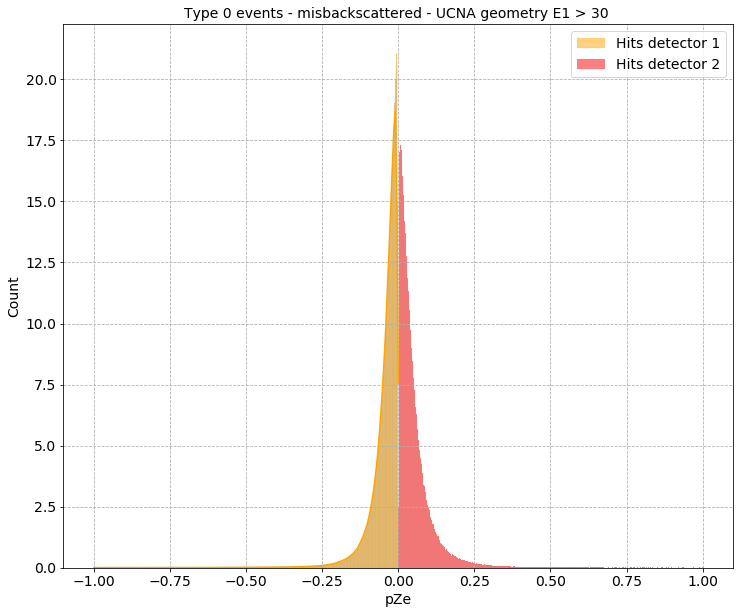

In [25]:
plt.figure(figsize=(12, 10))

sns.histplot(ucna01_opp["pZe"], stat = 'density',kde=True, color='orange', label = 'Hits detector 1')
sns.histplot(ucna02_opp["pZe"], stat = 'density',kde=True, color='red', label = 'Hits detector 2')
plt.legend(fontsize = 14)
plt.xlabel('pZe', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Type 0 events - misbackscattered - UCNA geometry E1 > 30 ', fontsize = 14)
plt.grid(linestyle = '--')



/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `

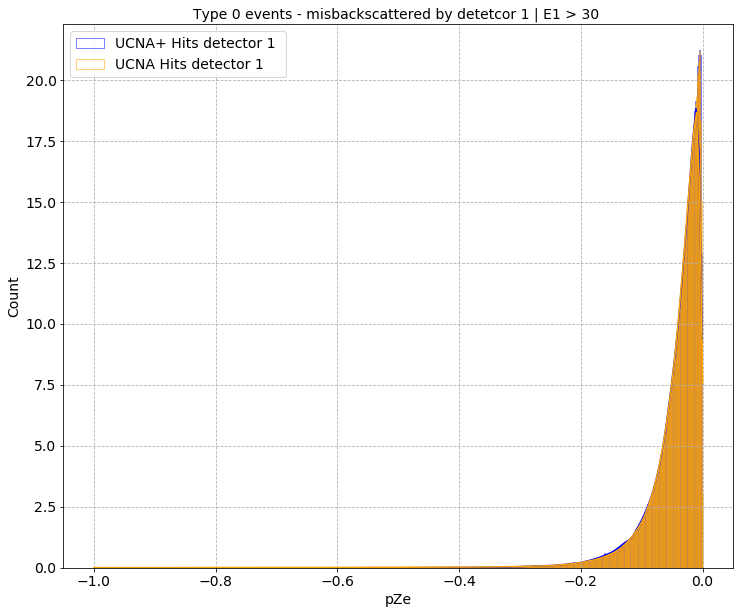

In [31]:
plt.figure(figsize=(12, 10))

sns.histplot(ucna01_plus_opp["pZe"], stat = 'density',kde=True, color='blue', fill = False,label = 'UCNA+ Hits detector 1 ')
sns.histplot(ucna01_opp["pZe"], stat = 'density',kde=True, color='orange', fill = False, label = 'UCNA Hits detector 1')
plt.legend(fontsize = 14)
plt.xlabel('pZe', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Type 0 events - misbackscattered by detetcor 1 | E1 > 30 ', fontsize = 14)
plt.grid(linestyle = '--')



In [18]:
print(ucna01_plus_opp.shape[0])
print(ucna02_plus_opp.shape[0])
print(ucna02_opp.shape[0])
print(ucna01_opp.shape[0])

202278
258085
1223754
964706


In [21]:
print(ucna01_plus_opp.shape[0]/tot_evt_ucna_plus)
print(ucna02_plus_opp.shape[0]/tot_evt_ucna_plus)
print(ucna02_opp.shape[0]/tot_evt_ucna)
print(ucna01_opp.shape[0]/tot_evt_ucna)

0.010120225140712945
0.012912320200125078
0.012254575084825416
0.009660489045822599


/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/rhythm/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  

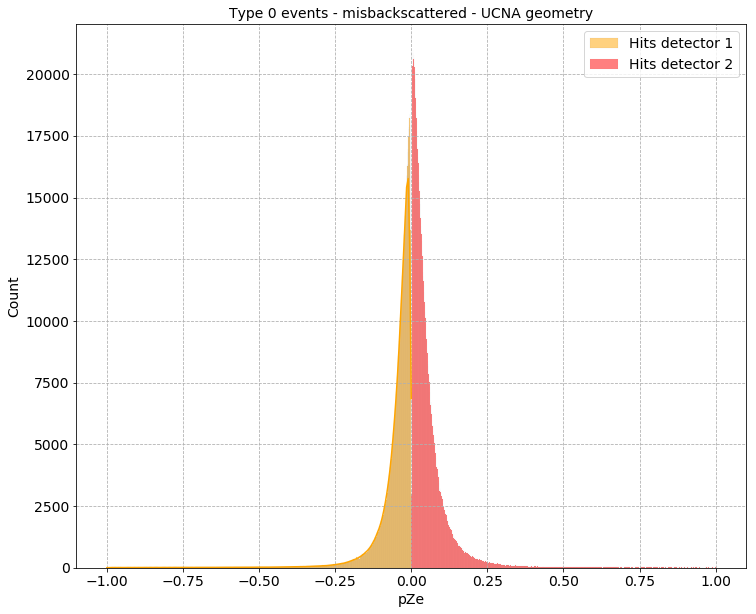

In [14]:
plt.figure(figsize=(12, 10))

sns.histplot(ucna01_opp["pZe"], kde=True, color='orange', label = 'Hits detector 1')
sns.histplot(ucna02_opp["pZe"], kde=True, color='blue', label = 'Hits detector 2')
plt.legend(fontsize = 14)
plt.xlabel('pZe', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Type 0 events - misbackscattered  UCNA geometry', fontsize = 14)
plt.grid(linestyle = '--')



/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `

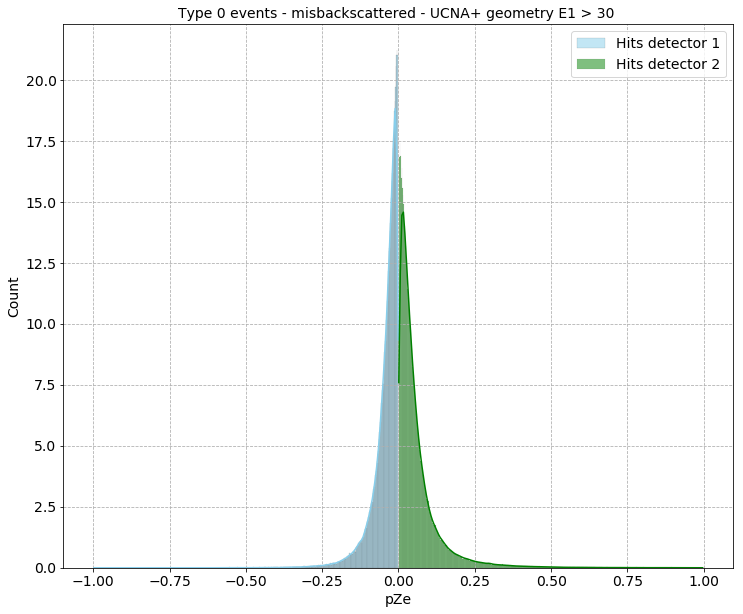

In [27]:
plt.figure(figsize=(12, 10))

sns.histplot(ucna01_plus_opp["pZe"], stat = 'density',kde=True, color='skyblue', label = 'Hits detector 1')
sns.histplot(ucna02_plus_opp["pZe"], stat = 'density',kde=True, color='green', label = 'Hits detector 2')
plt.legend(fontsize = 14)
plt.xlabel('pZe', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Type 0 events - misbackscattered - UCNA+ geometry E1 > 30 ', fontsize = 14)
plt.grid(linestyle = '--')



/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `

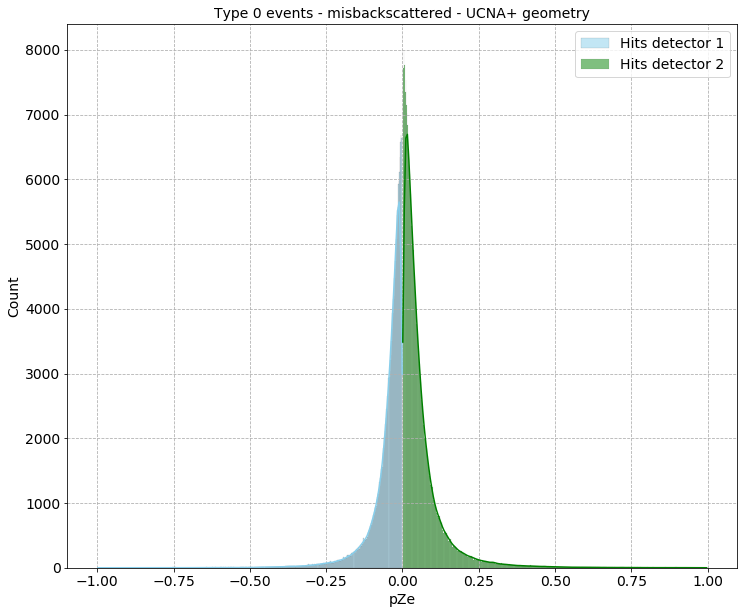

In [15]:
plt.figure(figsize=(12, 10))

sns.histplot(ucna01_plus_opp["pZe"], kde=True, color='skyblue', label = 'Hits detector 1')
sns.histplot(ucna02_plus_opp["pZe"], kde=True, color='green', label = 'Hits detector 2')
plt.legend(fontsize = 14)
plt.xlabel('pZe', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Type 0 events - misbackscattered - UCNA+ geometry', fontsize = 14)
plt.grid(linestyle = '--')



In [3]:

import dask.array as da
from dask import delayed

/home/rhythm/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [9]:
import uproot
import dask
#import dask.array as da
#from dask import delayed

def read_and_filter(file_path, tree_name="outputTree", branch_name="TotalEnergyDeposited", threshold=30):
    # Open the ROOT file using uproot
    with uproot.open(file_path) as file:
        # Access the TTree from the file
        tree = file[tree_name]

        # Access the branch
        tree = file[tree_name]

        # Access the branch
        energy_branch = tree[branch_name]

         # Read the values from the branch
        energy_values = energy_branch.array()

        # Use Dask.delayed to parallelize the computation
        selected_events = dask.delayed([i for i, value in enumerate(energy_values) if value > threshold])()

        # Compute and print the selected events
        dask.compute(selected_events)



In [2]:
root_file_path = './feb/feb20-singleRootFiles/ucna.root'
with uproot.open(root_file_path) as file:
    # Access the TTree within the file (replace "tree_name" with the actual tree name)
    tree = file["outputTree"]

    # Access specific branches (replace "branch1", "branch2", etc., with actual branch names)
    E1_values = tree["energyDet1"].array()
    E2_values = tree["energyDet2"].array()
    #t1= tree["timeHitDet1"].array()
    #t2= tree["timeHitDet2"].array()
    #pz= tree["cosangle"].array()
    #ke= tree["KE"].array()

In [14]:
ucnap_file_path = './feb/feb20-singleRootFiles/ucna_plus.root'
with uproot.open(ucnap_file_path) as file:
    # Access the TTree within the file (replace "tree_name" with the actual tree name)
    tree_p = file["outputTree"]

    # Access specific branches (replace "branch1", "branch2", etc., with actual branch names)
    E1_values_p = tree_p["energyDet1"].array()
    E2_values_p = tree_p["energyDet2"].array()
    #t1_p= tree_p["timeHitDet1"].array()
    #t2_p= tree_p["timeHitDet2"].array()
    #pz_p= tree_p["cosangle"].array()
    #ke_p= tree_p["KE"].array()

In [3]:
data =  {'E1': E1_values, 'E2': E2_values }
ucna_df = pd.DataFrame(data)

In [13]:

if ucna_df.equals(ucnap_df):
    print("The DataFrames are equal")
else:
    print("The DataFrames are not equal")

The DataFrames are equal


In [15]:
datap =  {'E1': E1_values_p, 'E2': E2_values_p}
ucnap_df = pd.DataFrame(datap)

In [20]:
ucnap_df.shape[0] - ucna_df.shape[0]

-67325000

In [9]:
x = ucna_df[ucna_df['E1'] !=0]

In [10]:
x.shape

(40195452, 6)

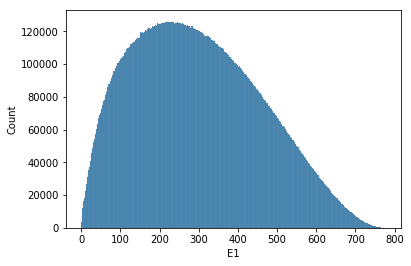

In [11]:
sns.histplot(x['E1'])

In [10]:
y = ucna_df[ucna_df['E2'] !=0]

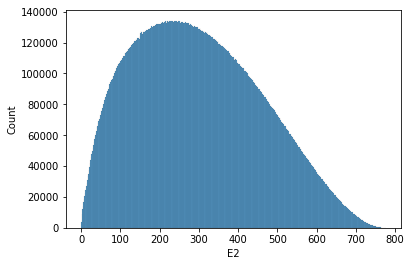

In [11]:
sns.histplot(y['E2'])

In [23]:
del y

In [ ]:
# Example usageread_and_filter("/mnt/gpfs3_amd/scratch/rgu245/Now/nDecayUCNA+/delete.root", branch_name="TotalEnergyDeposited", threshold=30)

read_and_filter("/home/rhythm/Research/ml/research/2024/delete.root", branch_name="TotalEnergyDeposited", threshold=600)


In [42]:
ucna_df

,E1,E2
0,0.000000,508.963848
1,102.082718,0.000000
2,0.000000,220.930566
3,102.562207,0.000000
4,0.000000,381.327777
...,...,...
87312495,424.542758,0.000000
87312496,183.700727,265.635955
87312497,103.394825,0.000000
87312498,0.000000,277.038125


In [34]:
x = ucna_df.loc[ucna_df['E1']  <110 ,'E1'] = 0
x

0

In [5]:
def aboveThrEvts(df, Ethr):
    df.loc[df['E1']  < Ethr,'E1'] = 0
    df.loc[df['E2']  < Ethr,'E2'] = 0
  #  type0['Etot'] = type0['E1'] + type0['E2']
    return df

In [6]:
# Create an empty dictionary to store DataFrames
result_dataframes = {}

for E in np.arange(15,40,10):
    E_thr = aboveThrEvts(ucna_df, E)
    #definition of type 1
    type1_thr = E_thr[ (E_thr['E1'] != 0) & (E_thr['E2'] != 0) ]
    type0_thr = E_thr[ (E_thr['E1'] != 0) ^ (E_thr['E2'] != 0) ]
    del E_thr
    type0_thr['Etot'] = (type0_thr['E1'] + type0_thr['E2']).astype(np.float32)
    type0_thr['A_0'] = (type0_thr['E1'] - type0_thr['E2']) / (type0_thr['E1'] + type0_thr['E2'])
    type0_thr = type0_thr.drop(['E1', 'E2'], axis = 1)
    type1_thr['Etot'] = type1_thr['E1'] + type1_thr['E2']
    type1_thr = type1_thr.drop(['E1', 'E2'], axis = 1)
    print(f'energy - {E} type0_thr {type0_thr.shape}, type1_thr{type1_thr.shape}')
    
    result_dataframes[f'type1_thr_E_{E}'] = type1_thr
    result_dataframes[f'type0_thr_E_{E}'] = type0_thr
    del type1_thr,type0_thr

    

/home/rhythm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/rhythm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/rhythm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

energy - 15 type0_thr (81971377, 2), type1_thr(1100441, 1)
energy - 25 type0_thr (81565092, 2), type1_thr(1040219, 1)
energy - 35 type0_thr (80976811, 2), type1_thr(969373, 1)


MemoryError: Unable to allocate 625. MiB for an array with shape (1, 81971377) and data type float64

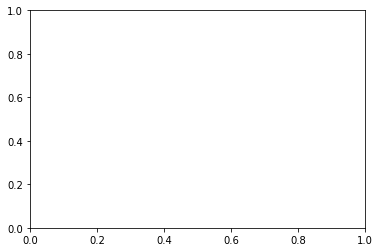

In [8]:
type0_thr_E_15 = result_dataframes['type0_thr_E_15']

# Create a histogram using Seaborn
sns.histplot(type0_thr_E_15['Etot'], bins=8000, kde=True)  # Adjust parameters as needed



In [8]:
type1_thr

,E1,E2
38,391.625464,48.569016
61,203.345503,172.631960
245,48.030625,69.813320
383,161.510086,214.865807
439,28.682198,28.510109
...,...,...
87312040,213.253536,361.167398
87312073,69.658826,64.486259
87312139,268.638634,154.459465
87312345,182.742817,134.251077


In [7]:
type1_thr

,E1,E2,Etot
61,203.345503,172.631960,375.977463
383,161.510086,214.865807,376.375893
708,309.341269,164.865639,474.206908
924,148.032035,112.454190,260.486225
966,159.992285,129.954617,289.946902
...,...,...,...
87311691,239.711129,189.226266,428.937395
87312040,213.253536,361.167398,574.420933
87312139,268.638634,154.459465,423.098099
87312345,182.742817,134.251077,316.993894


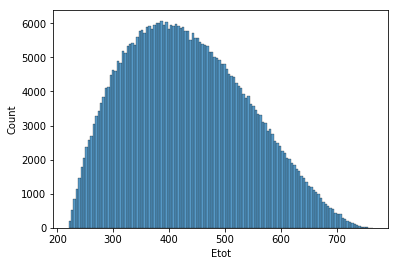

In [8]:
sns.histplot(type1_thr['Etot'])

In [49]:
type1_thr

,E1,E2
61,203.345503,172.631960
383,161.510086,214.865807
708,309.341269,164.865639
924,148.032035,112.454190
966,159.992285,129.954617
...,...,...
87311691,239.711129,189.226266
87312040,213.253536,361.167398
87312139,268.638634,154.459465
87312345,182.742817,134.251077


In [47]:
ucna_df

,E1,E2
0,0.000000,508.963848
1,0.000000,0.000000
2,0.000000,220.930566
3,0.000000,0.000000
4,0.000000,381.327777
...,...,...
87312495,424.542758,0.000000
87312496,183.700727,265.635955
87312497,0.000000,0.000000
87312498,0.000000,277.038125


In [46]:
type0_thr

,E1,E2
0,0.000000,508.963848
1,0.000000,0.000000
2,0.000000,220.930566
3,0.000000,0.000000
4,0.000000,381.327777
...,...,...
87312495,424.542758,0.000000
87312496,183.700727,265.635955
87312497,0.000000,0.000000
87312498,0.000000,277.038125
